In [1]:
import os
import re
import sys
from pathlib import Path

import h5py
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scanpy as sc
import skimage
from joblib import Parallel, delayed
from skimage import exposure, io
from tqdm.notebook import tqdm, trange

sc.settings.verbosity = 3

from functools import reduce

import anndata as ad
import seaborn as sns
from matplotlib import cm, colors
from matplotlib.pyplot import rc_context
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import multiprocessing

n_cpu = multiprocessing.cpu_count()

In [3]:
p_dir = (Path().cwd().parents[0]).absolute()
data_dir = p_dir / "data"

In [4]:
%load_ext autoreload
%autoreload 2

module_path = str(p_dir / "src")

if module_path not in sys.path:
    sys.path.append(module_path)


In [5]:
donors = [
    "LN Donor A",
    "LN Donor E",
    "INT Donor B",
    "INT Donor E",
    "TS Donor A",
    "TS Donor E",
]


In [6]:
# adata_path = data_dir / "metadata" / f"combined_10_07.h5ad"
adata_path = data_dir / "metadata" / f"combined_semi_final.h5ad"
adata = sc.read_h5ad(adata_path)

# Spatial analysis

In [7]:
import spatial as sm

In [8]:
# Spatial LDA need centroid info as indivisual obs
adata.obs['X_centroid'] = adata.obsm['spatial'][:,0]
adata.obs['Y_centroid'] = adata.obsm['spatial'][:,1]
adata.obs = adata.obs.reset_index(drop=True)

In [9]:
import palettable
heatmap_cmp = palettable.cmocean.diverging.Balance_20.mpl_colormap
heatmap_cmp_r = palettable.cmocean.diverging.Balance_20_r.mpl_colormap

In [10]:
print(adata.obs.Phenotype.cat.categories )

Index(['Activated B', 'B-cells', 'B-cells MZ', 'CD38+', 'Cytotoxic T-cells',
       'DZ B-cells', 'Exhausted T-cells', 'FDC', 'Helper T-cells',
       'LZ B-cells', 'Other', 'Stroma', 'Stroma Vimentin+', 'TFH', 'Treg',
       'myeloid-derived cells'],
      dtype='object')


In [11]:
rename_dict = {'Activated B':'B-cells',  'B-cells MZ':'B-cells', 'CD38+': 'Stroma', 
               'Stroma Vimentin+': 'Stroma'
              }

# Rename a cluster
adata.obs["cluster"] = adata.obs["Phenotype"].map(lambda x: rename_dict.get(x, x)).astype('category')

# Check the updated cluster names
print("Updated cluster names:", adata.obs["cluster"].cat.categories)

Updated cluster names: Index(['B-cells', 'Cytotoxic T-cells', 'DZ B-cells', 'Exhausted T-cells',
       'FDC', 'Helper T-cells', 'LZ B-cells', 'Other', 'Stroma', 'TFH', 'Treg',
       'myeloid-derived cells'],
      dtype='object')


In [12]:
import matplotlib 

# Get adata 
phenotype_name = 'cluster'

sc.tl.dendrogram(adata, groupby=phenotype_name)

adata.uns["New_colors"] = sc.pl.palettes.vega_20_scanpy[:len(np.unique(adata.obs[phenotype_name]))]
cluster_label_order = adata.uns[f'dendrogram_{phenotype_name}']['categories_ordered']

# Define colormap
colors = adata.uns["New_colors"]
labels = adata.obs[phenotype_name].cat.categories.tolist()

colors_rgb = []
for color in colors:
    colors_rgb.append(matplotlib.colors.hex2color(color))
colors_rgb = np.array(colors_rgb) * 255
colors_rgb = colors_rgb.astype(np.uint8)
colors_rgb_dict = {k:v for k,v in zip(labels, colors_rgb)}

    using data matrix X directly
Storing dendrogram info using `.uns['dendrogram_cluster']`


# Individual Tissue 

LN Donor A
Processing Image: ['LN Donor A']
Categories (1, object): ['LN Donor A']
Identifying neighbours within 20 pixels of every cell
Mapping phenotype to neighbors
Performing 1000 permutations
Consolidating the permutation results


C:\Users\thu71\Anaconda3\envs\traj\lib\site-packages\anndata\compat\_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
C:\Users\thu71\Anaconda3\envs\traj\lib\site-packages\anndata\_core\anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Processing Image: LN Donor A


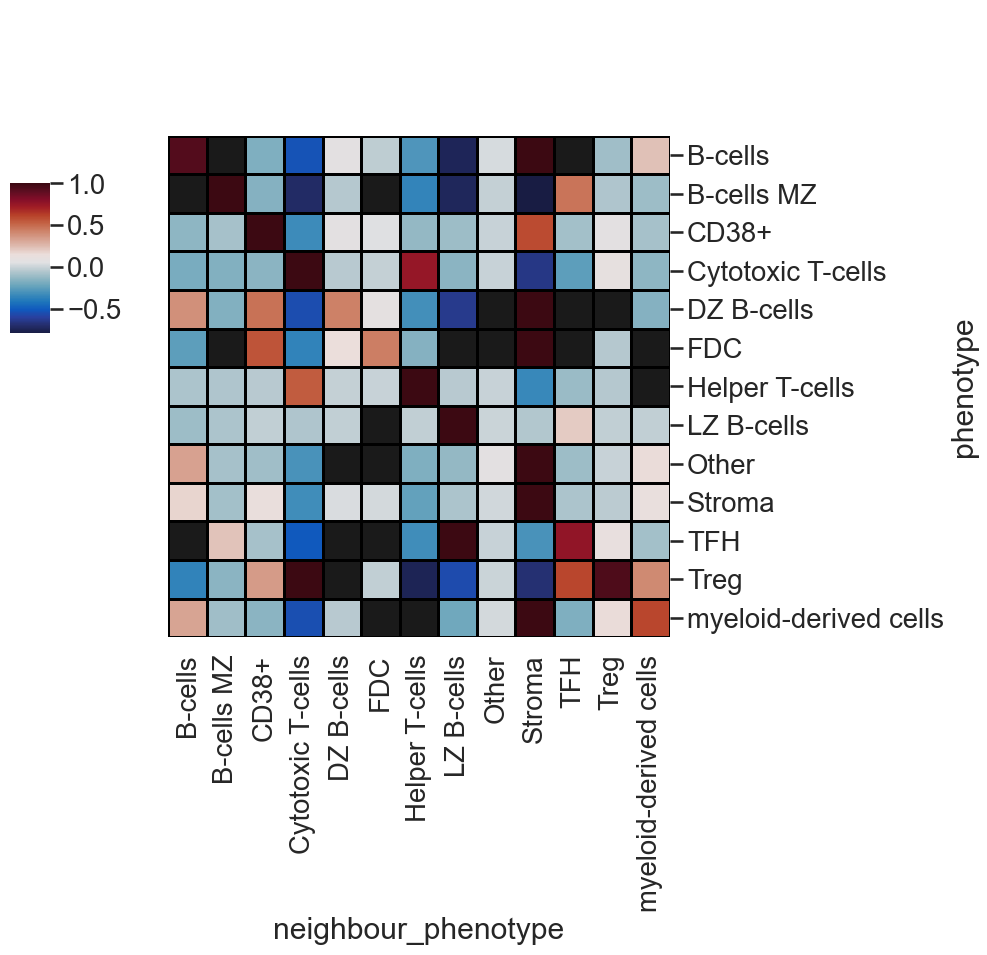

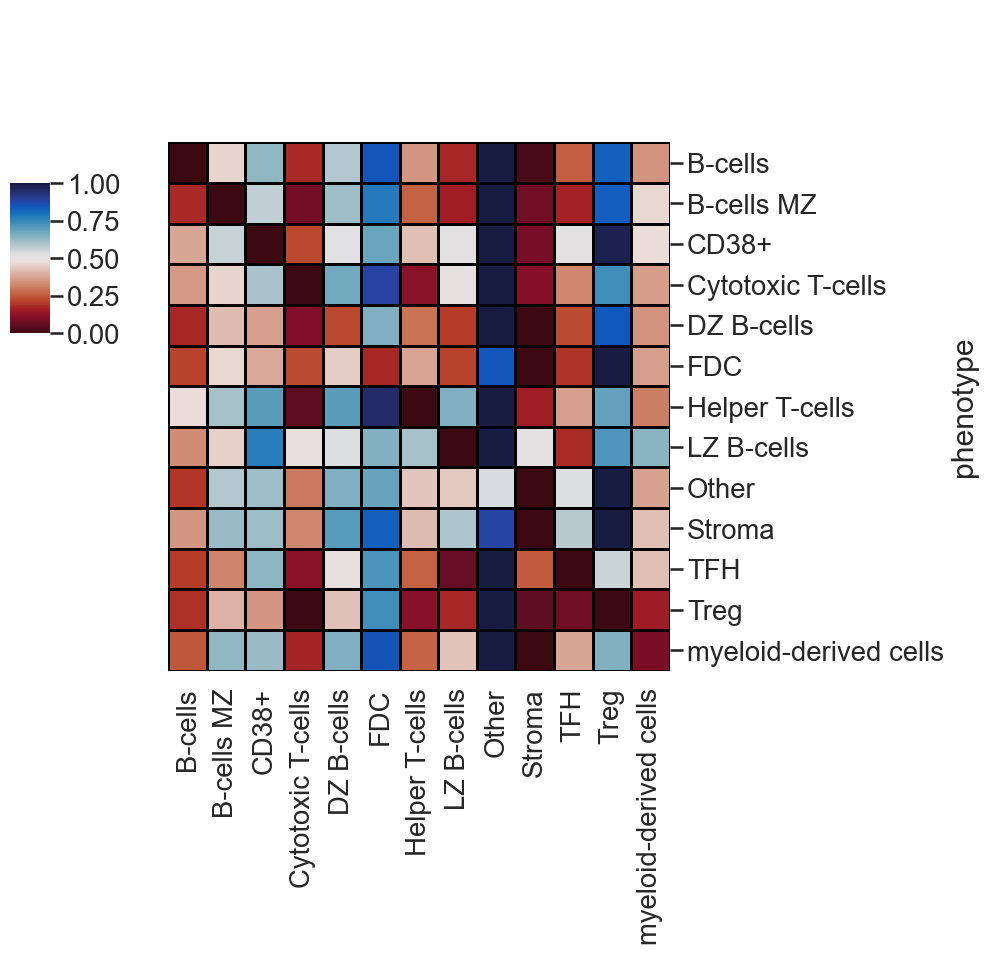

LN Donor E
Processing Image: ['LN Donor E']
Categories (1, object): ['LN Donor E']
Identifying neighbours within 20 pixels of every cell
Mapping phenotype to neighbors
Performing 1000 permutations
Consolidating the permutation results


C:\Users\thu71\Anaconda3\envs\traj\lib\site-packages\anndata\compat\_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
C:\Users\thu71\Anaconda3\envs\traj\lib\site-packages\anndata\_core\anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Processing Image: LN Donor E


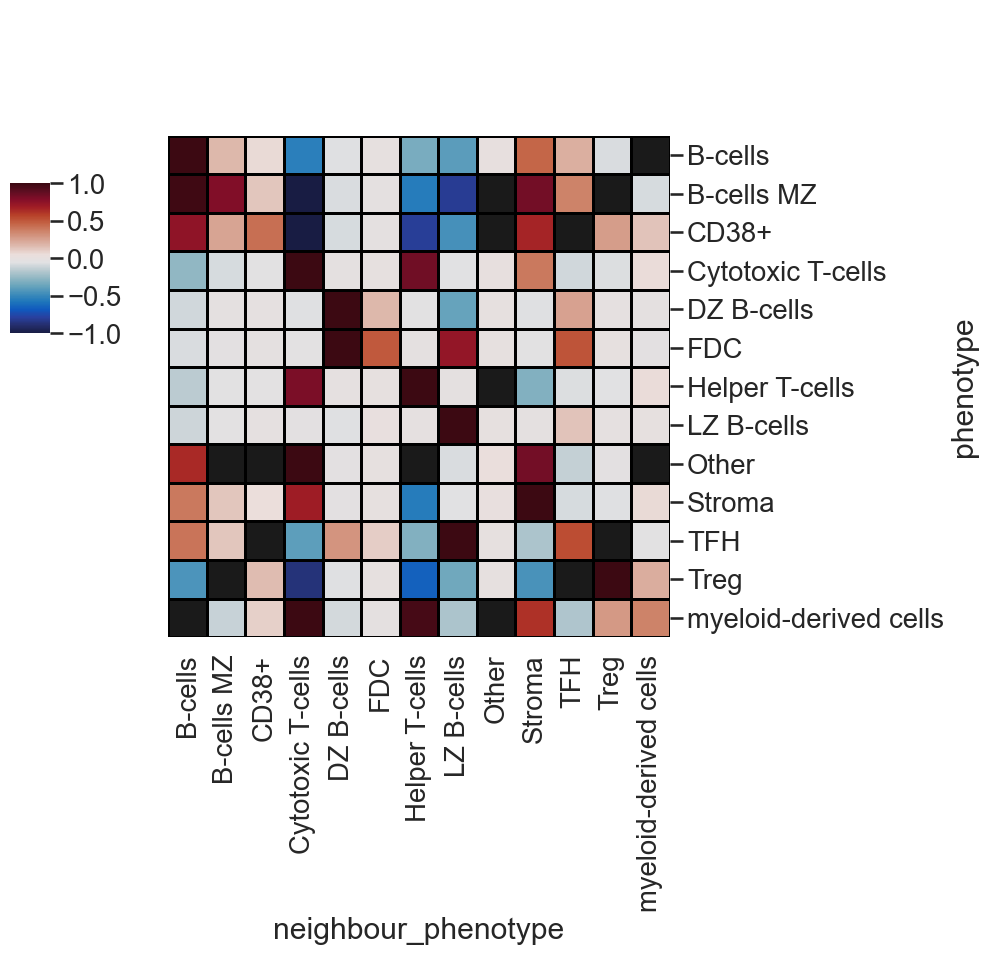

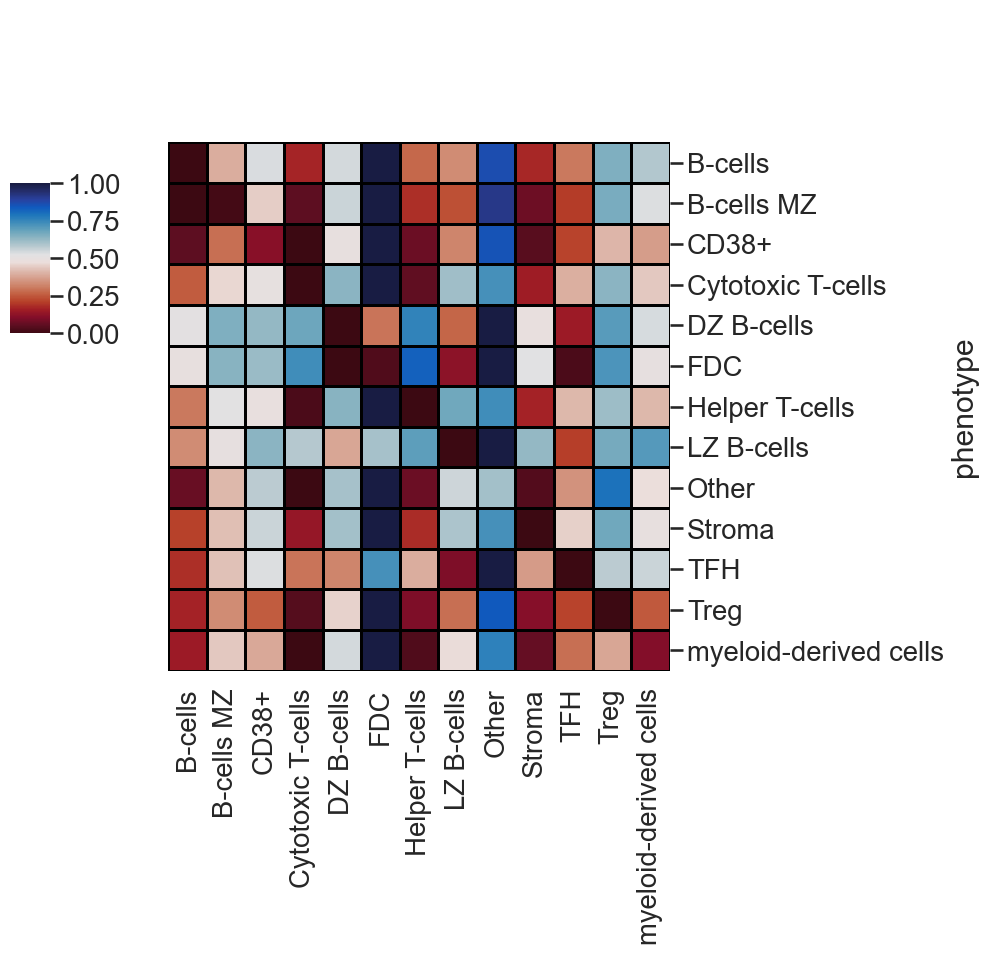

INT Donor B
Processing Image: ['INT Donor B']
Categories (1, object): ['INT Donor B']
Identifying neighbours within 20 pixels of every cell
Mapping phenotype to neighbors
Performing 1000 permutations
Consolidating the permutation results


C:\Users\thu71\Anaconda3\envs\traj\lib\site-packages\anndata\compat\_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
C:\Users\thu71\Anaconda3\envs\traj\lib\site-packages\anndata\_core\anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Processing Image: INT Donor B


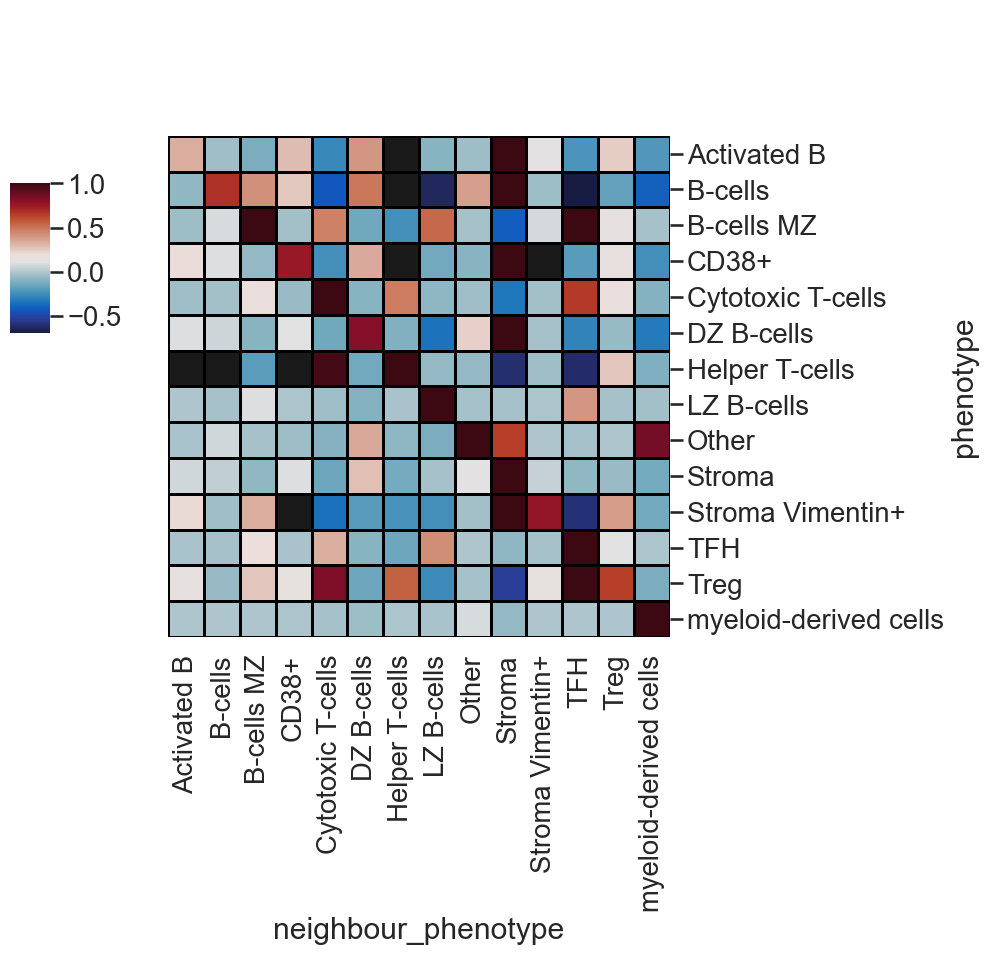

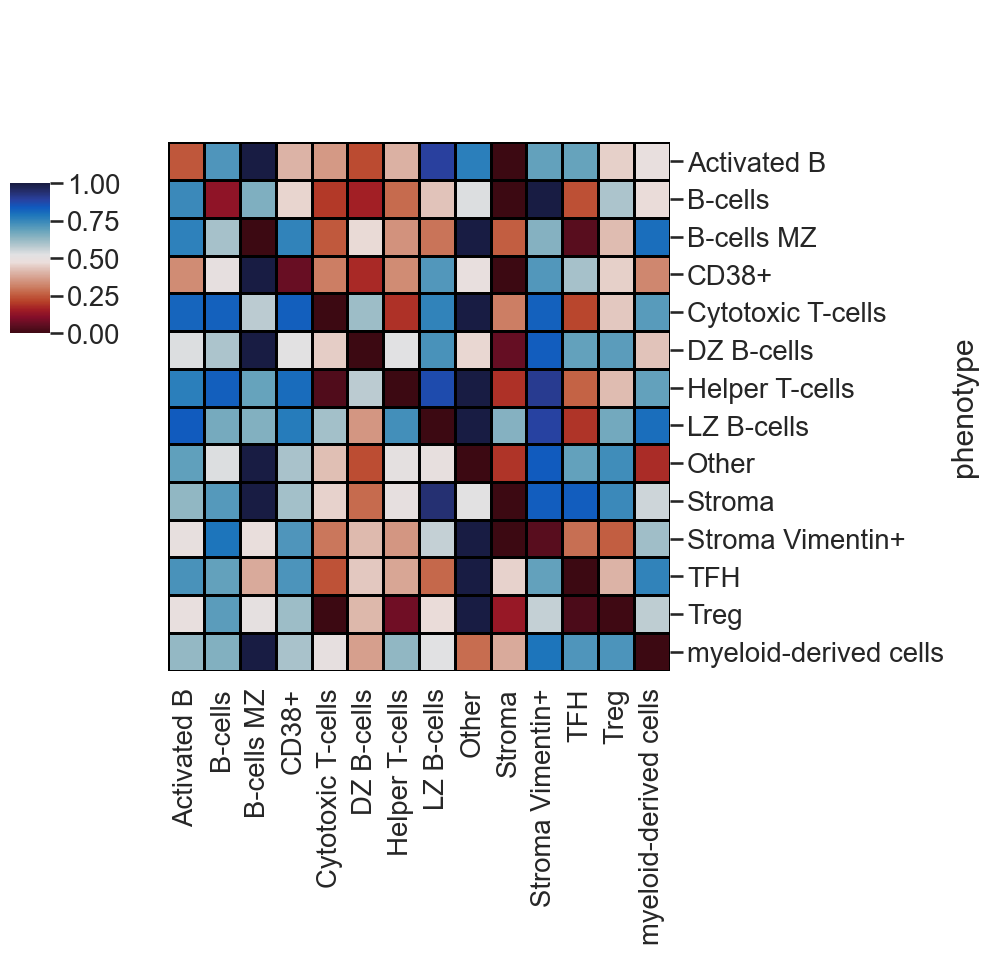

INT Donor E
Processing Image: ['INT Donor E']
Categories (1, object): ['INT Donor E']
Identifying neighbours within 20 pixels of every cell
Mapping phenotype to neighbors
Performing 1000 permutations
Consolidating the permutation results


C:\Users\thu71\Anaconda3\envs\traj\lib\site-packages\anndata\compat\_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
C:\Users\thu71\Anaconda3\envs\traj\lib\site-packages\anndata\_core\anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Processing Image: INT Donor E


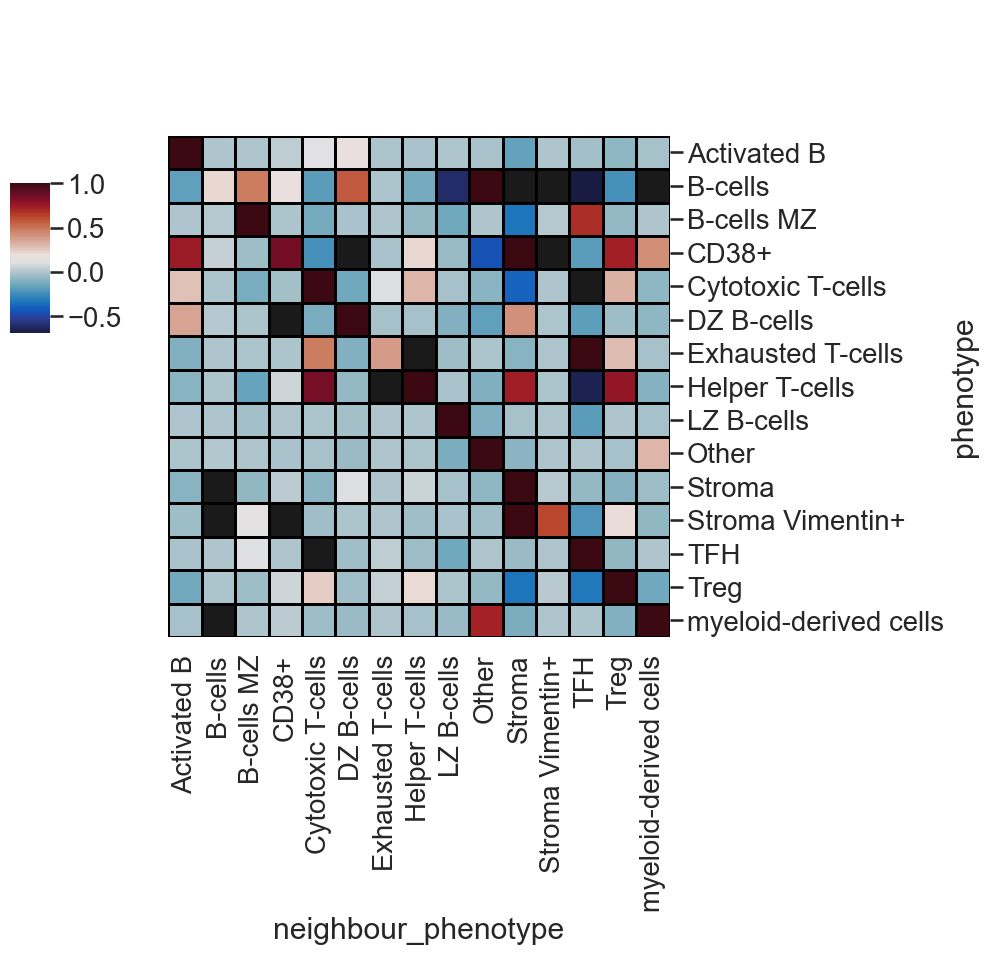

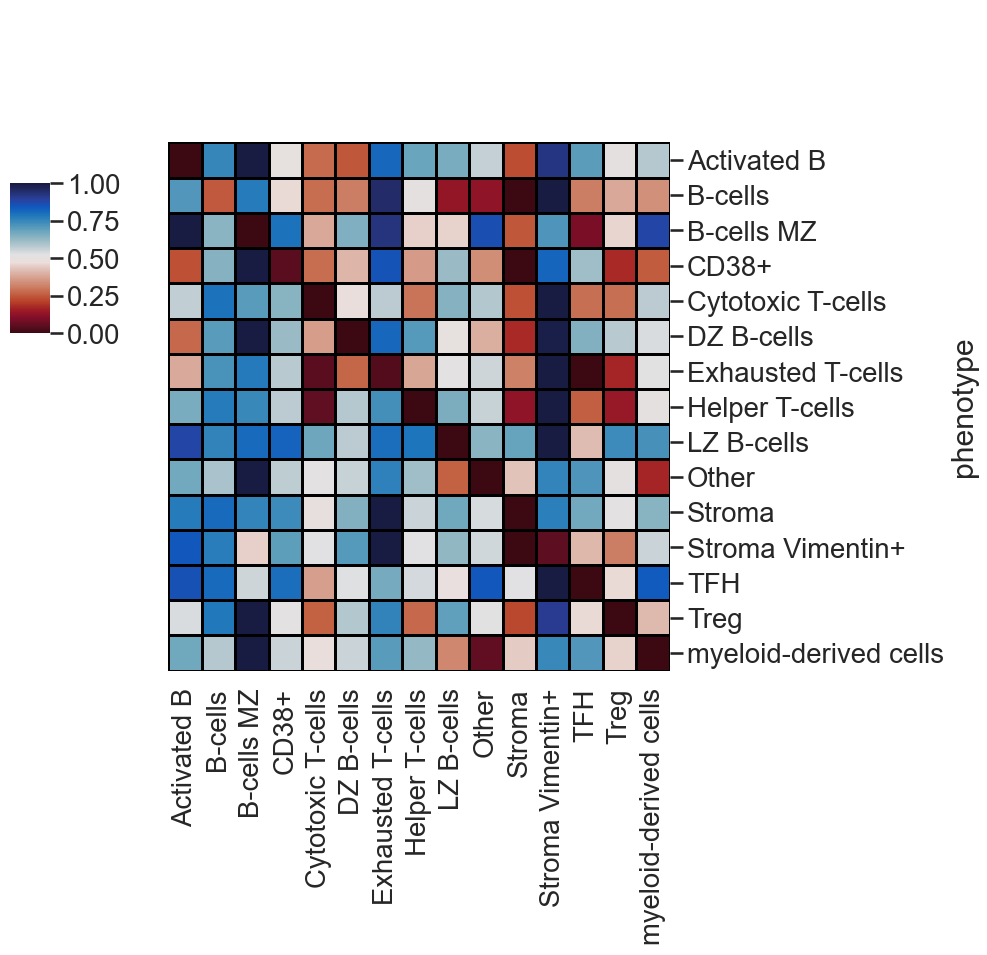

TS Donor A
Processing Image: ['TS Donor A']
Categories (1, object): ['TS Donor A']
Identifying neighbours within 20 pixels of every cell
Mapping phenotype to neighbors
Performing 1000 permutations
Consolidating the permutation results


C:\Users\thu71\Anaconda3\envs\traj\lib\site-packages\anndata\compat\_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
C:\Users\thu71\Anaconda3\envs\traj\lib\site-packages\anndata\_core\anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Processing Image: TS Donor A


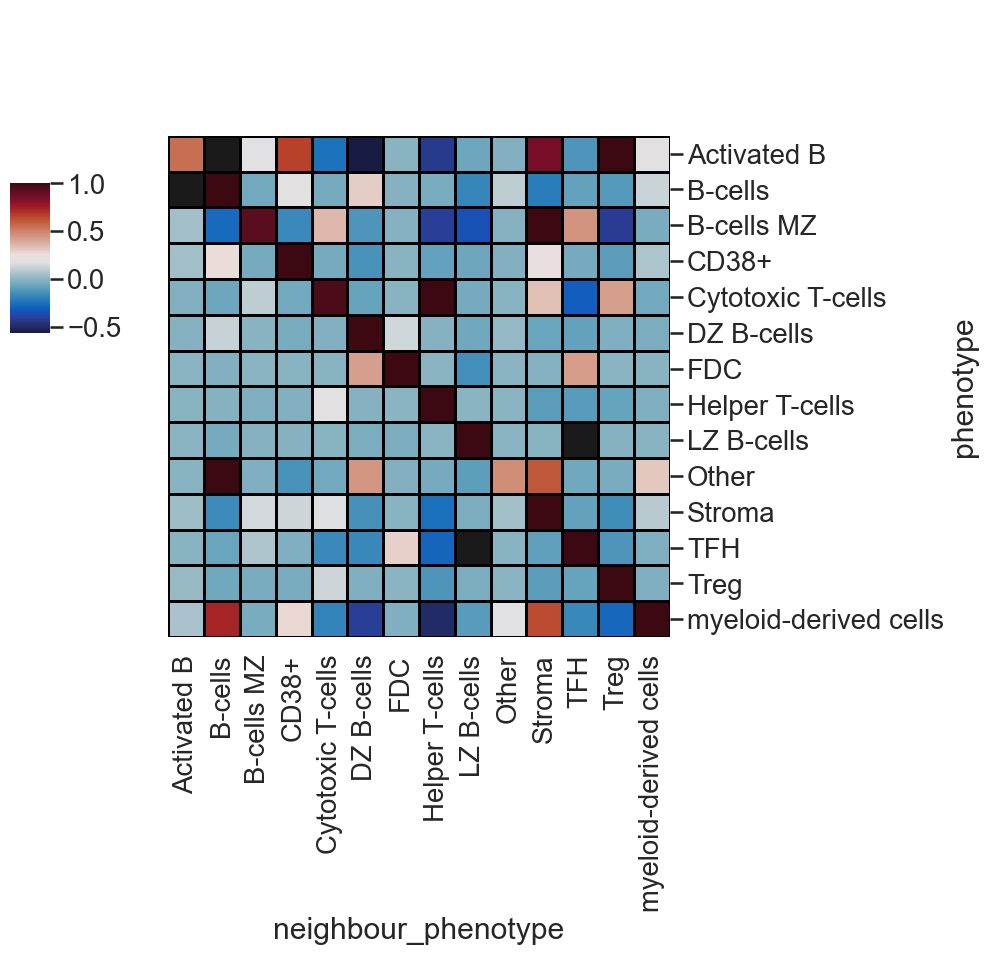

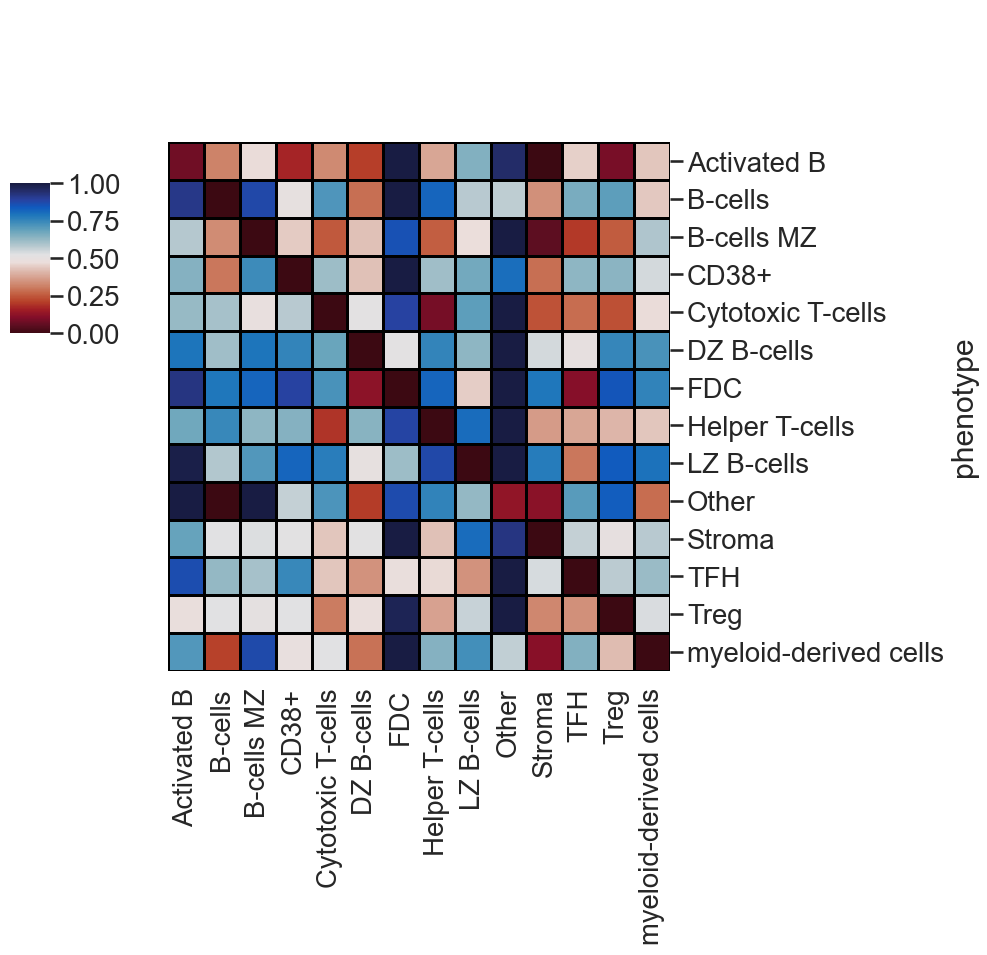

TS Donor E
Processing Image: ['TS Donor E']
Categories (1, object): ['TS Donor E']
Identifying neighbours within 20 pixels of every cell
Mapping phenotype to neighbors
Performing 1000 permutations
Consolidating the permutation results


C:\Users\thu71\Anaconda3\envs\traj\lib\site-packages\anndata\compat\_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
C:\Users\thu71\Anaconda3\envs\traj\lib\site-packages\anndata\_core\anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Processing Image: TS Donor E


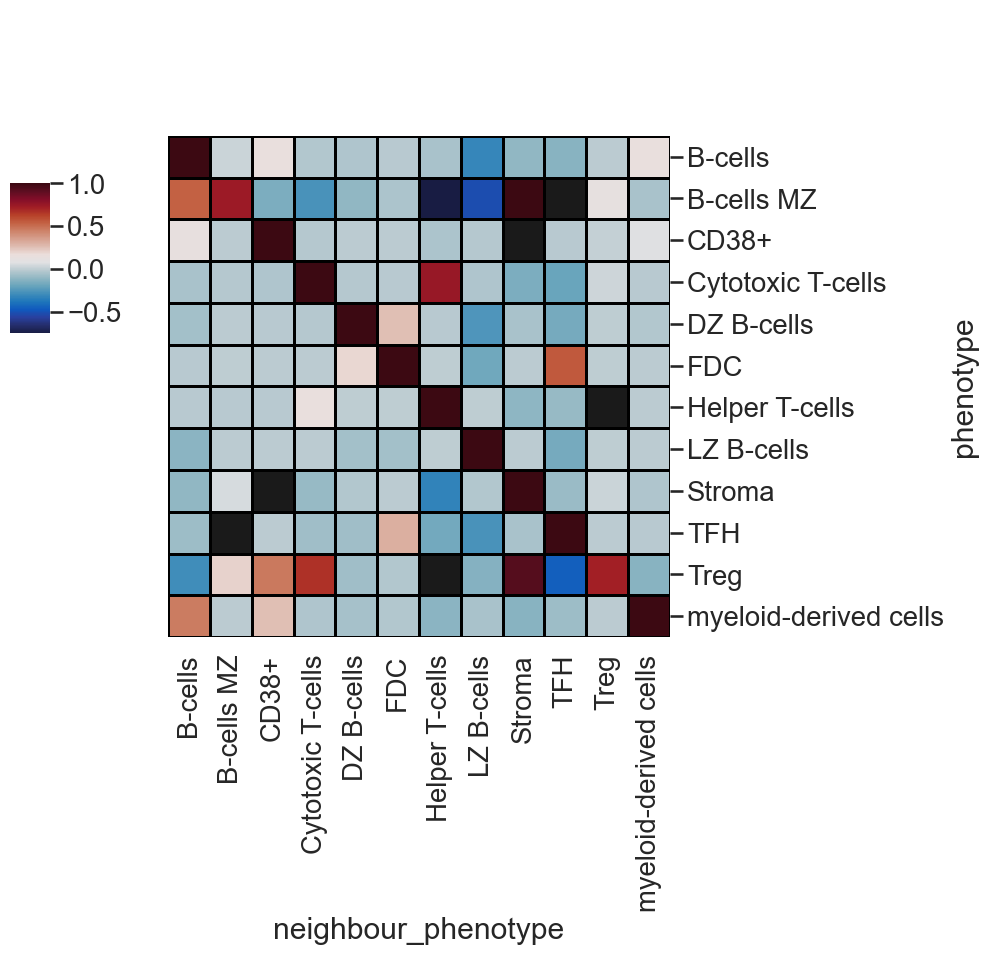

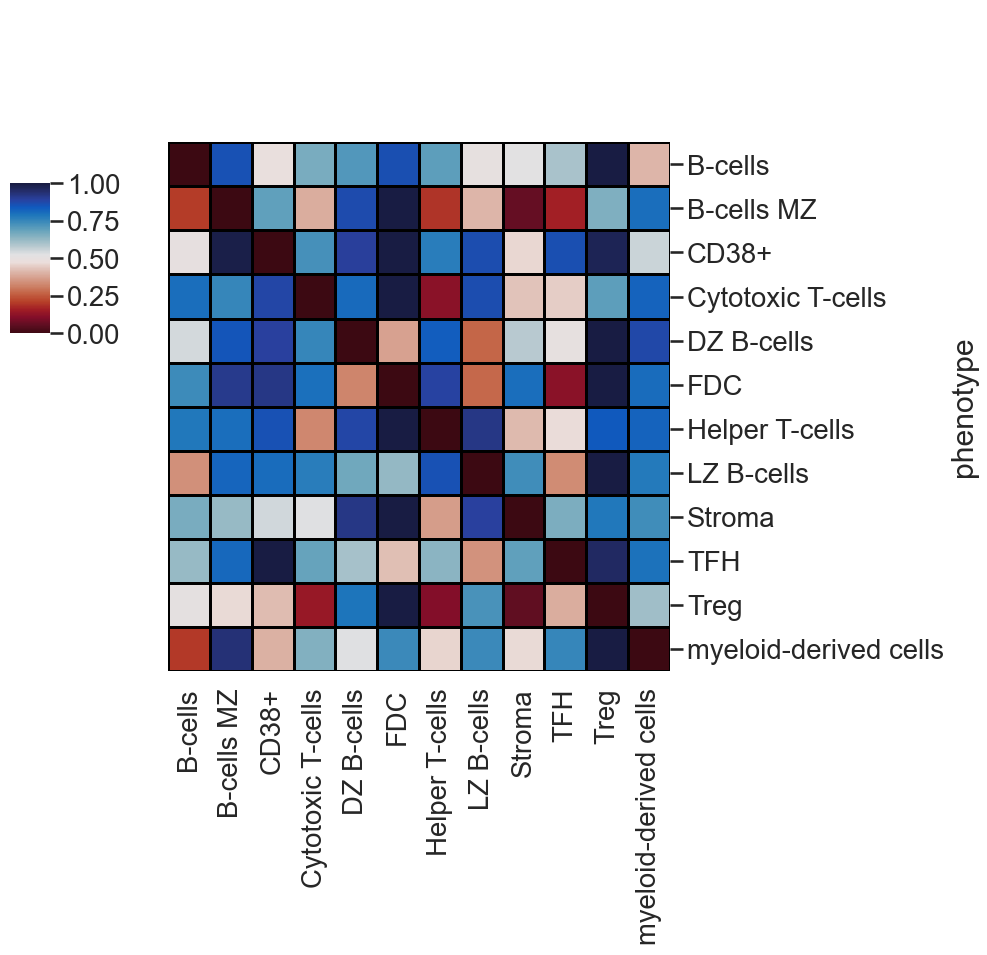

In [13]:
var = 'Phenotype'

for d in donors:
    print(d)
    adata_subset = adata[adata.obs.Dataset == d, :]
    counts = adata_subset.obs[var].value_counts()
    low_counts = counts[counts < 500].index.tolist()
    adata_subset = adata_subset[~adata_subset.obs[var].isin(low_counts)]
    
    # Plot interaction p value 
    with sns.plotting_context('talk', font_scale=1.2):
        adata_subset = sm.tl.spatial_interaction(adata_subset,
                                             method='radius', 
                                             radius=20, 
                                             knn=15,
                                             phenotype=var,
                                             imageid='Dataset',
                                             x_coordinate='X_centroid',
                                             y_coordinate='Y_centroid')
        
        sm.pl.spatial_interaction(adata_subset, 
                          summarize_plot=True, 
                          binary_view=False,
                          row_cluster=False, 
                          linewidths=0.75, 
                          linecolor='black',
                          cmap=heatmap_cmp,
                          p_val=0.0005,
                          nonsig_color='k',
                          cbar_pos=(0.,0.644,0.04, 0.15)    
                         )
        sm.tl.spatial_distance(adata_subset, x_coordinate='X_centroid', phenotype=var,
                              y_coordinate='Y_centroid', imageid='Dataset')

        sm.pl.spatial_distance(adata_subset,  phenotype=var, imageid='Dataset', heatmap_cmap=heatmap_cmp_r,
                       linewidths=0.75, linecolor='black', cbar_pos=(0.,0.644,0.04, 0.15), log=True)
    plt.show()


LN Donor A
Processing Image: ['LN Donor A']
Categories (1, object): ['LN Donor A']
Identifying neighbours within 20 pixels of every cell
Mapping phenotype to neighbors
Performing 1000 permutations
Consolidating the permutation results


C:\Users\thu71\Anaconda3\envs\traj\lib\site-packages\anndata\compat\_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
C:\Users\thu71\Anaconda3\envs\traj\lib\site-packages\anndata\_core\anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Processing Image: LN Donor A


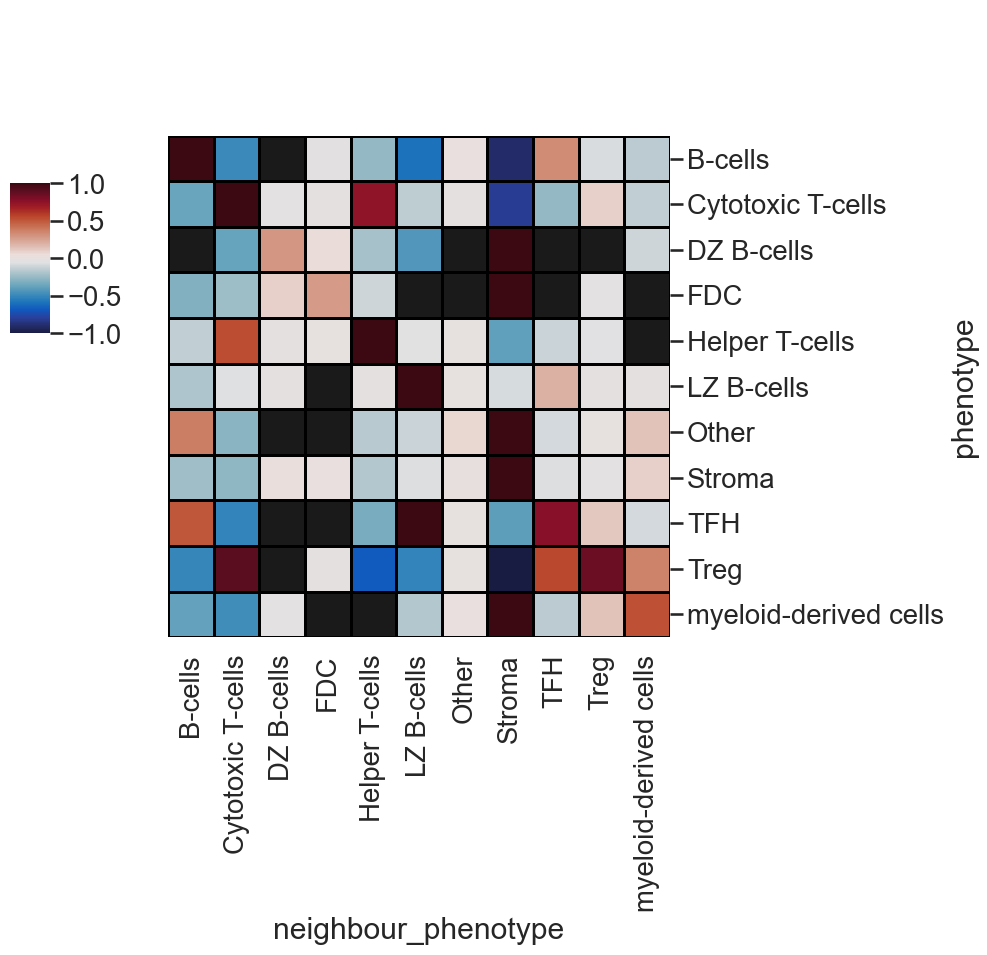

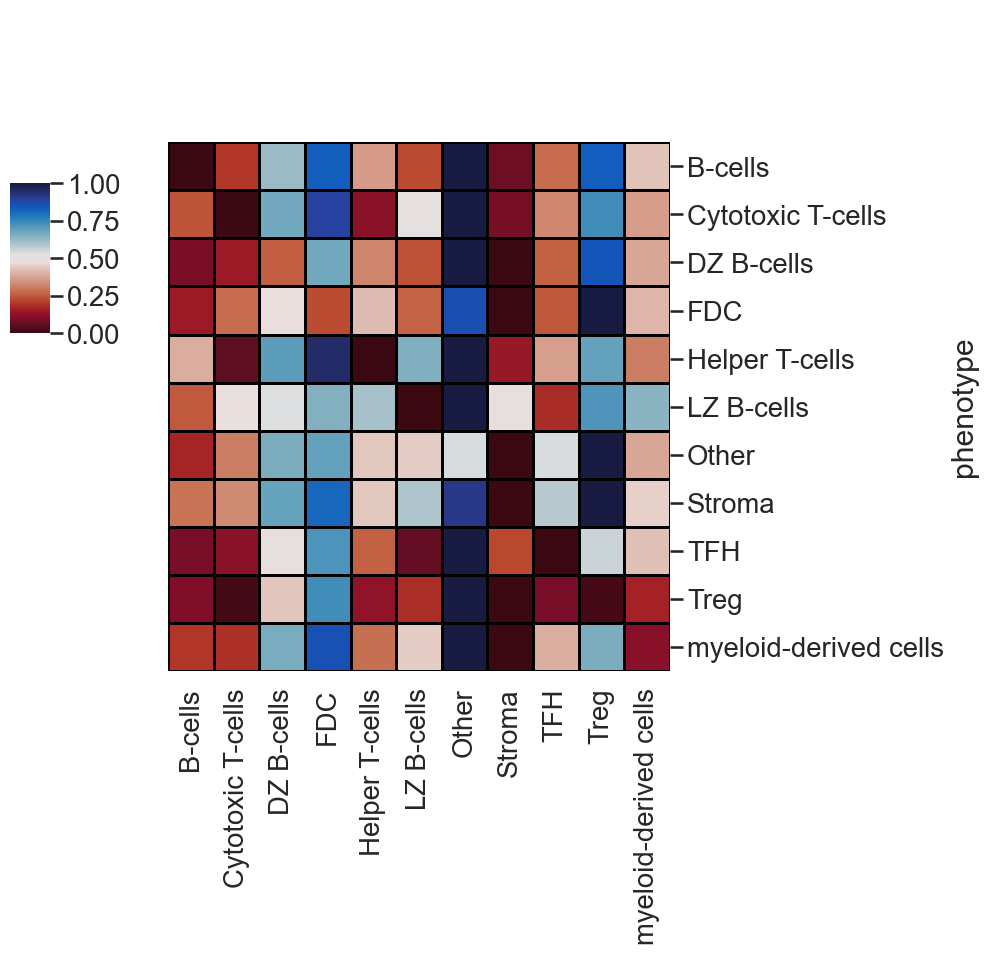

LN Donor E
Processing Image: ['LN Donor E']
Categories (1, object): ['LN Donor E']
Identifying neighbours within 20 pixels of every cell
Mapping phenotype to neighbors
Performing 1000 permutations
Consolidating the permutation results


C:\Users\thu71\Anaconda3\envs\traj\lib\site-packages\anndata\compat\_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
C:\Users\thu71\Anaconda3\envs\traj\lib\site-packages\anndata\_core\anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Processing Image: LN Donor E


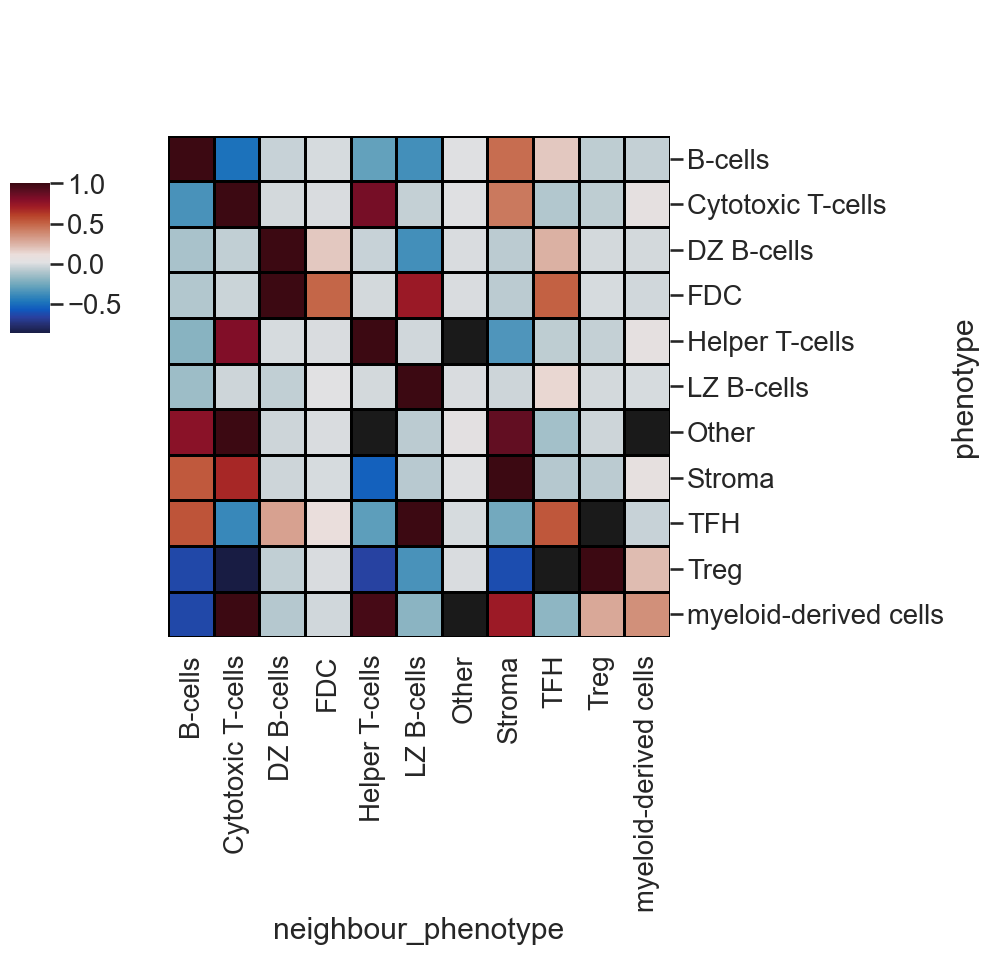

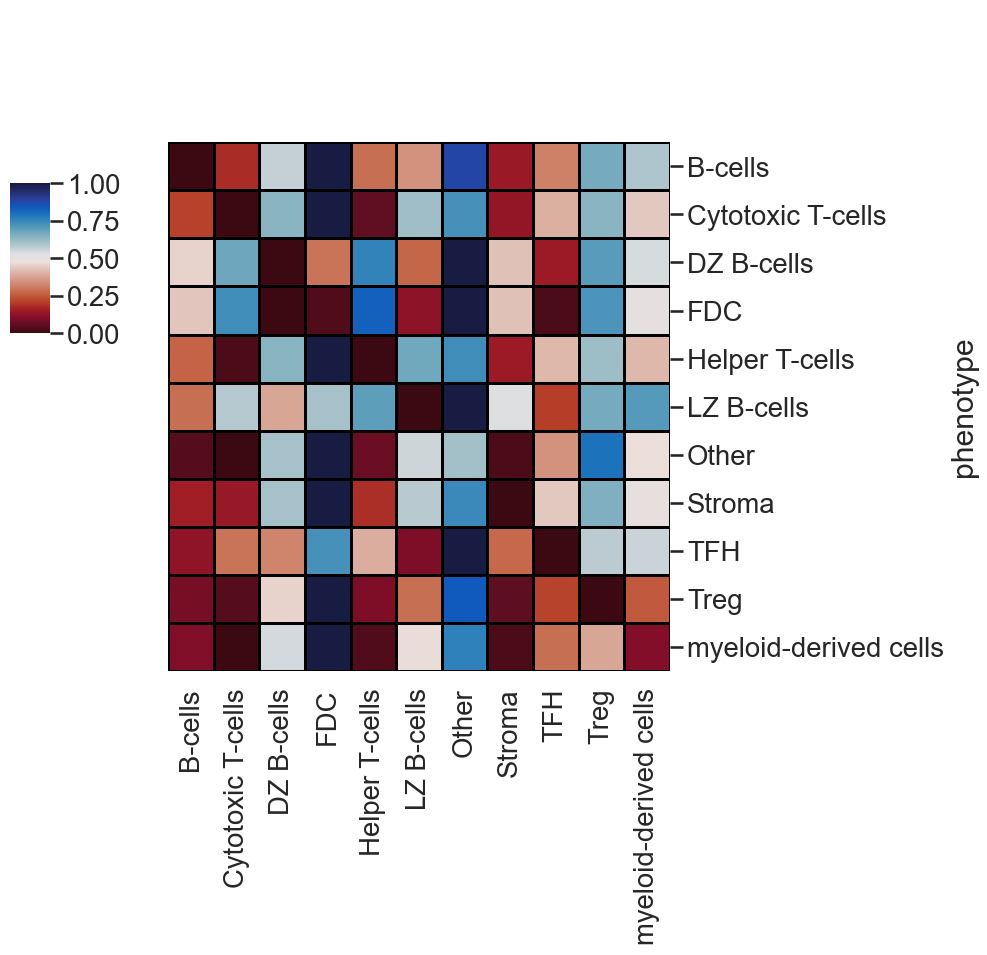

INT Donor B
Processing Image: ['INT Donor B']
Categories (1, object): ['INT Donor B']
Identifying neighbours within 20 pixels of every cell
Mapping phenotype to neighbors
Performing 1000 permutations
Consolidating the permutation results


C:\Users\thu71\Anaconda3\envs\traj\lib\site-packages\anndata\compat\_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
C:\Users\thu71\Anaconda3\envs\traj\lib\site-packages\anndata\_core\anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Processing Image: INT Donor B


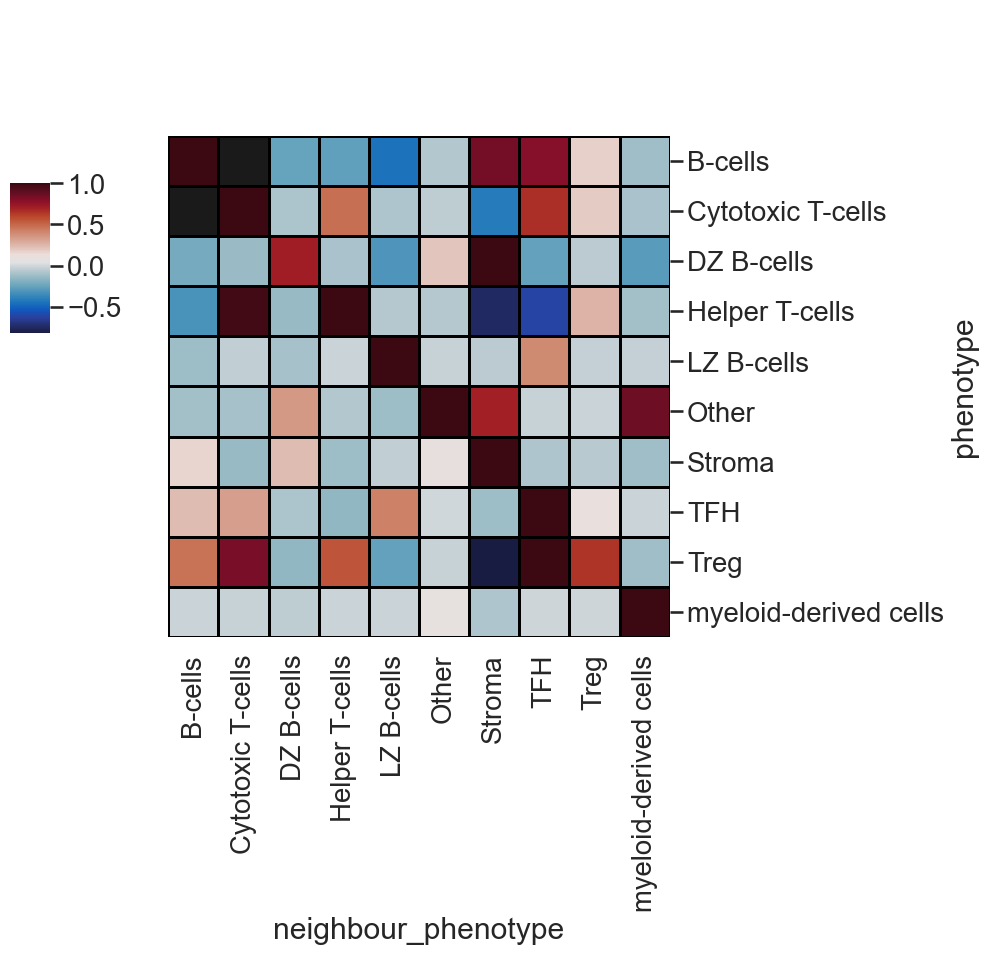

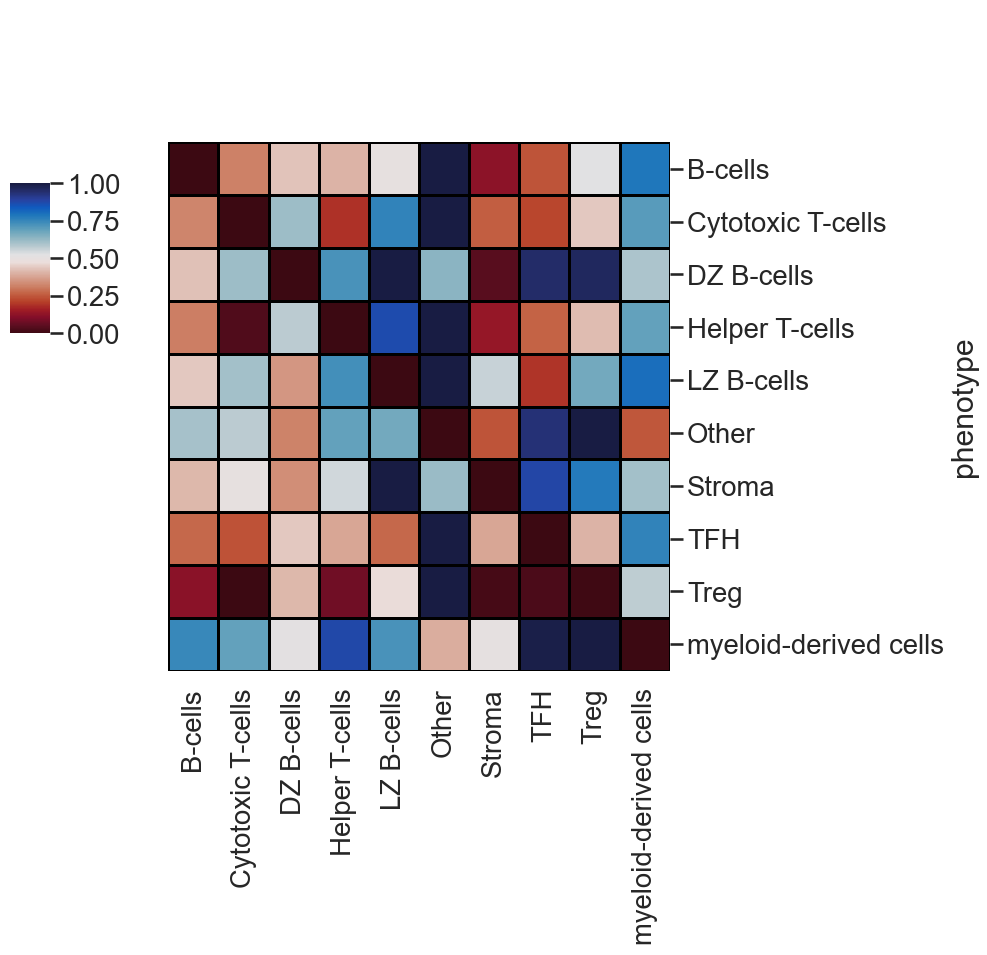

INT Donor E
Processing Image: ['INT Donor E']
Categories (1, object): ['INT Donor E']
Identifying neighbours within 20 pixels of every cell
Mapping phenotype to neighbors
Performing 1000 permutations
Consolidating the permutation results


C:\Users\thu71\Anaconda3\envs\traj\lib\site-packages\anndata\compat\_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
C:\Users\thu71\Anaconda3\envs\traj\lib\site-packages\anndata\_core\anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Processing Image: INT Donor E


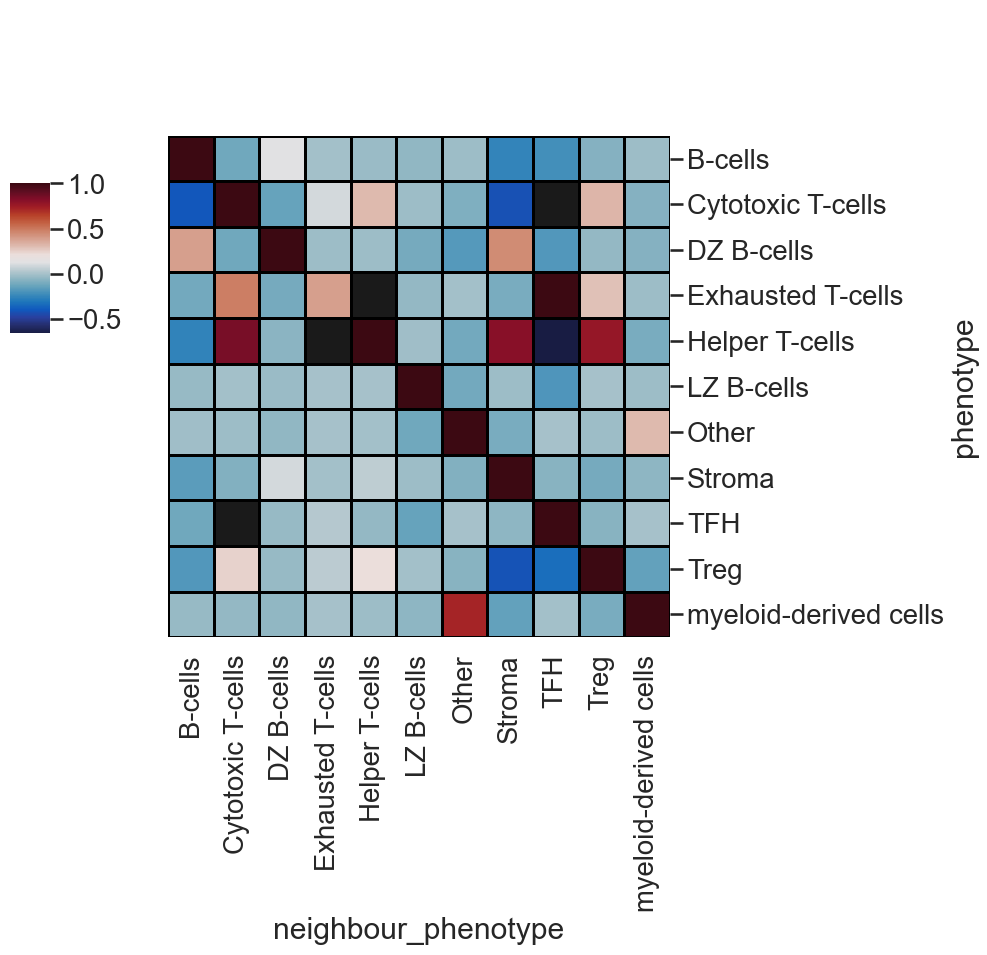

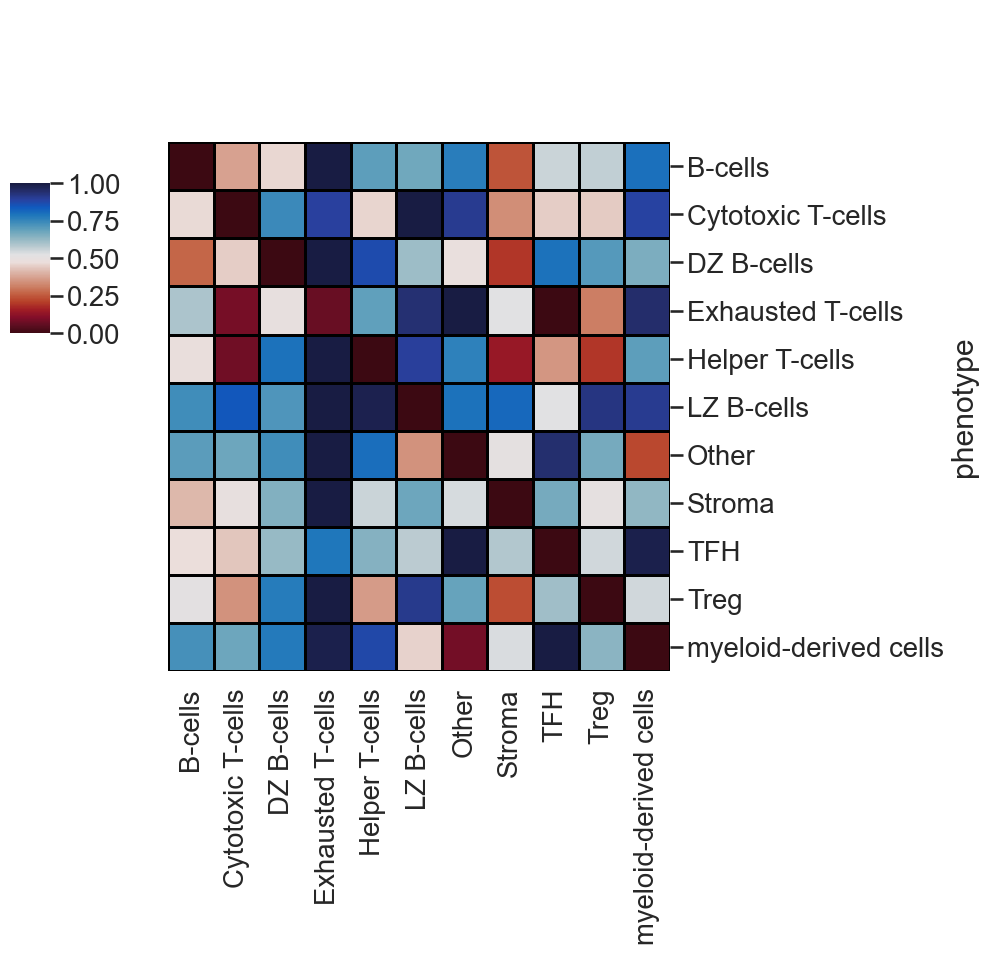

TS Donor A
Processing Image: ['TS Donor A']
Categories (1, object): ['TS Donor A']
Identifying neighbours within 20 pixels of every cell
Mapping phenotype to neighbors
Performing 1000 permutations
Consolidating the permutation results


C:\Users\thu71\Anaconda3\envs\traj\lib\site-packages\anndata\compat\_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
C:\Users\thu71\Anaconda3\envs\traj\lib\site-packages\anndata\_core\anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Processing Image: TS Donor A


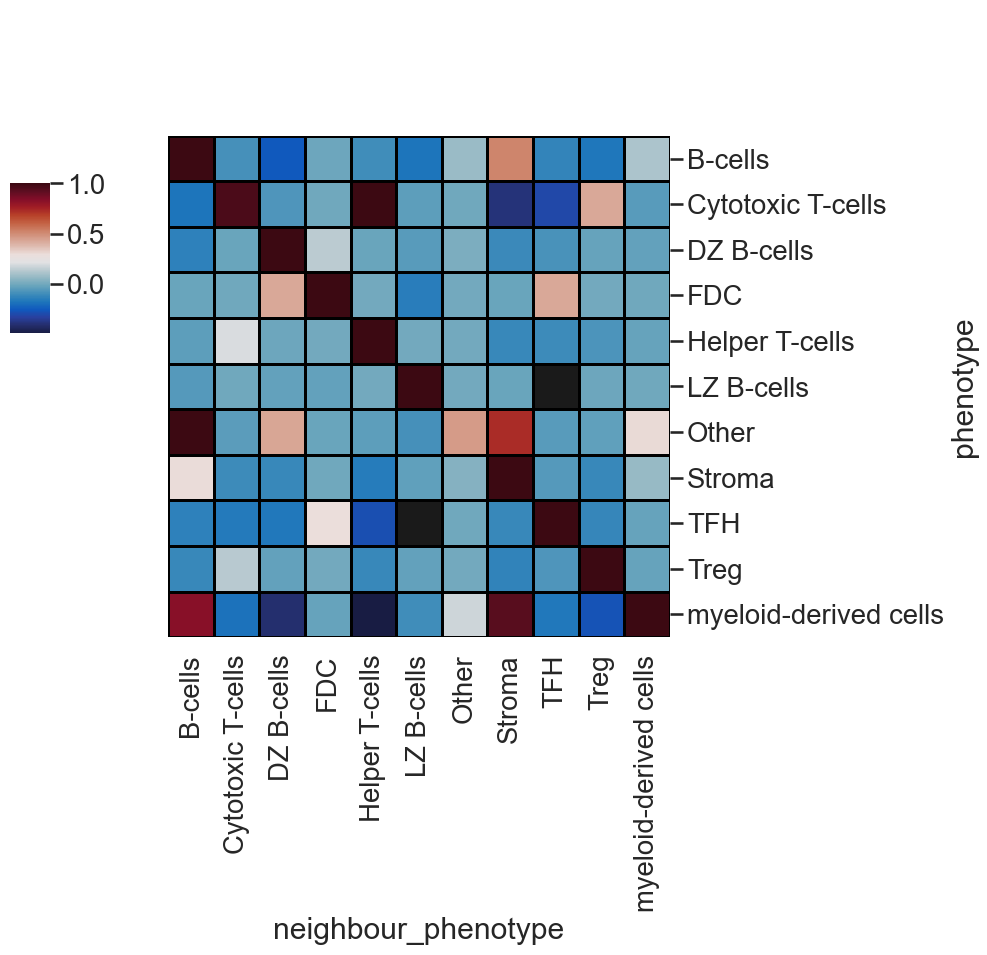

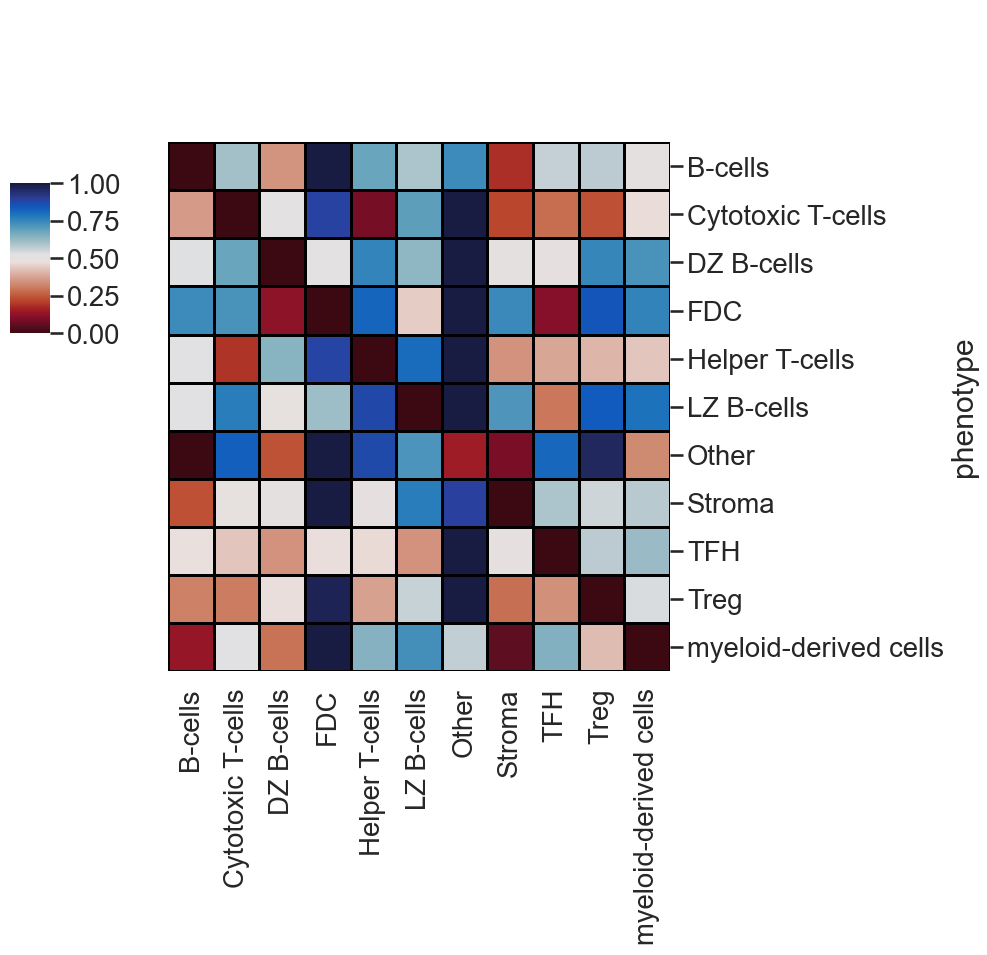

TS Donor E
Processing Image: ['TS Donor E']
Categories (1, object): ['TS Donor E']
Identifying neighbours within 20 pixels of every cell
Mapping phenotype to neighbors
Performing 1000 permutations
Consolidating the permutation results


C:\Users\thu71\Anaconda3\envs\traj\lib\site-packages\anndata\compat\_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
C:\Users\thu71\Anaconda3\envs\traj\lib\site-packages\anndata\_core\anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Processing Image: TS Donor E


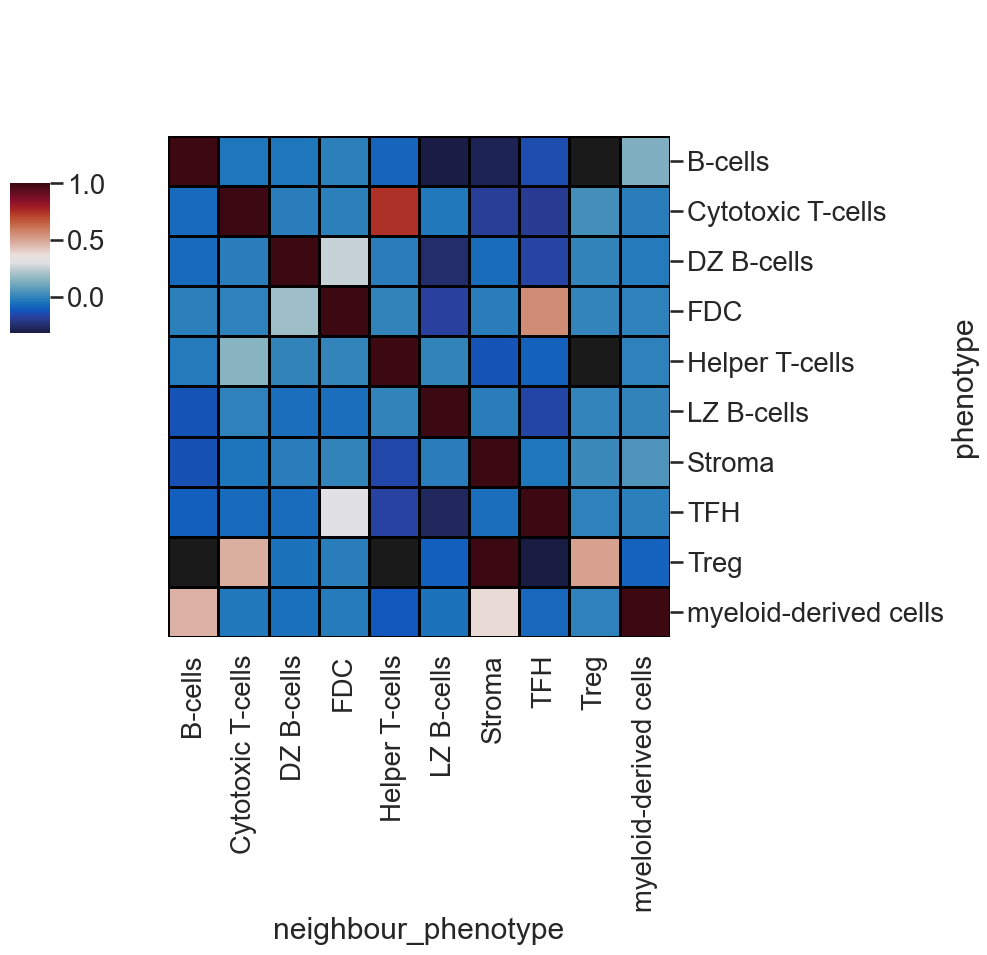

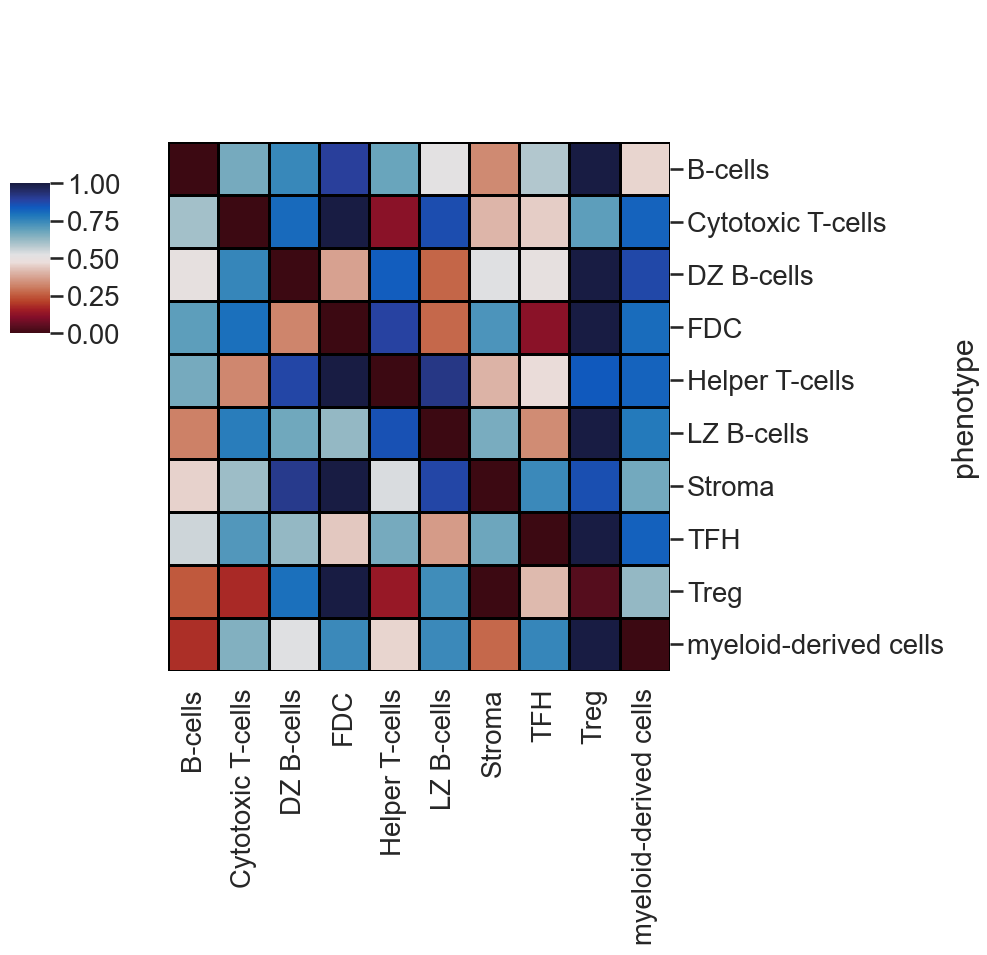

In [14]:
var = "cluster"

for d in donors:
    print(d)
    adata_subset = adata[adata.obs.Dataset == d, :]
    counts = adata_subset.obs[var].value_counts()
    low_counts = counts[counts < 500].index.tolist()
    adata_subset = adata_subset[~adata_subset.obs[var].isin(low_counts)]
    
    # Plot interaction p value 
    with sns.plotting_context('talk', font_scale=1.2):
        adata_subset = sm.tl.spatial_interaction(adata_subset,
                                             method='radius', 
                                             radius=20, 
                                             knn=15,
                                             phenotype=var,
                                             imageid='Dataset',
                                             x_coordinate='X_centroid',
                                             y_coordinate='Y_centroid')
        
        sm.pl.spatial_interaction(adata_subset, 
                          summarize_plot=True, 
                          binary_view=False,
                          row_cluster=False, 
                          linewidths=0.75, 
                          linecolor='black',
                          cmap=heatmap_cmp,
                          p_val=0.0005,
                          nonsig_color='k',
                          cbar_pos=(0.,0.644,0.04, 0.15)    
                         )
        sm.tl.spatial_distance(adata_subset, x_coordinate='X_centroid', phenotype=var,
                              y_coordinate='Y_centroid', imageid='Dataset')

        sm.pl.spatial_distance(adata_subset,  phenotype=var, imageid='Dataset', heatmap_cmap=heatmap_cmp_r,
                       linewidths=0.75, linecolor='black', cbar_pos=(0.,0.644,0.04, 0.15), log=True)
    plt.show()


# Per tissue type

In [15]:
from mne_connectivity.viz import plot_connectivity_circle
from mne.viz import circular_layout

['LN Donor A', 'LN Donor E']
Processing Image: ['LN Donor A']
Categories (1, object): ['LN Donor A']
Identifying neighbours within 20 pixels of every cell
Mapping phenotype to neighbors
Performing 1000 permutations
Consolidating the permutation results
Processing Image: ['LN Donor E']
Categories (1, object): ['LN Donor E']
Identifying neighbours within 20 pixels of every cell
Mapping phenotype to neighbors
Performing 1000 permutations
Consolidating the permutation results


C:\Users\thu71\Anaconda3\envs\traj\lib\site-packages\anndata\compat\_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
C:\Users\thu71\Anaconda3\envs\traj\lib\site-packages\anndata\_core\anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


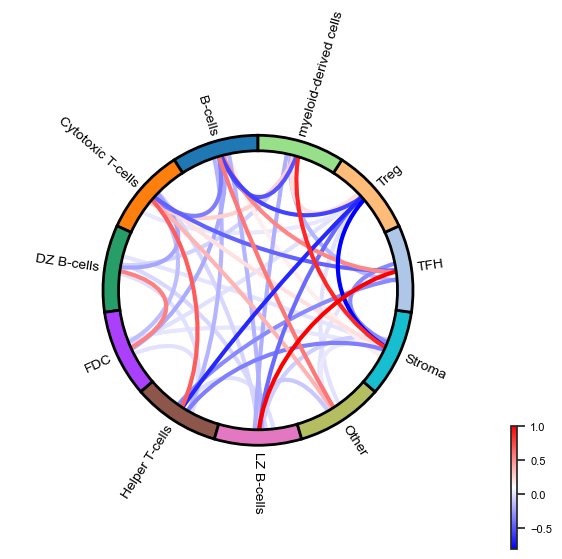

['TS Donor A', 'TS Donor E']
Processing Image: ['TS Donor A']
Categories (1, object): ['TS Donor A']
Identifying neighbours within 20 pixels of every cell
Mapping phenotype to neighbors
Performing 1000 permutations
Consolidating the permutation results
Processing Image: ['TS Donor E']
Categories (1, object): ['TS Donor E']
Identifying neighbours within 20 pixels of every cell
Mapping phenotype to neighbors
Performing 1000 permutations
Consolidating the permutation results


C:\Users\thu71\Anaconda3\envs\traj\lib\site-packages\anndata\compat\_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
C:\Users\thu71\Anaconda3\envs\traj\lib\site-packages\anndata\_core\anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


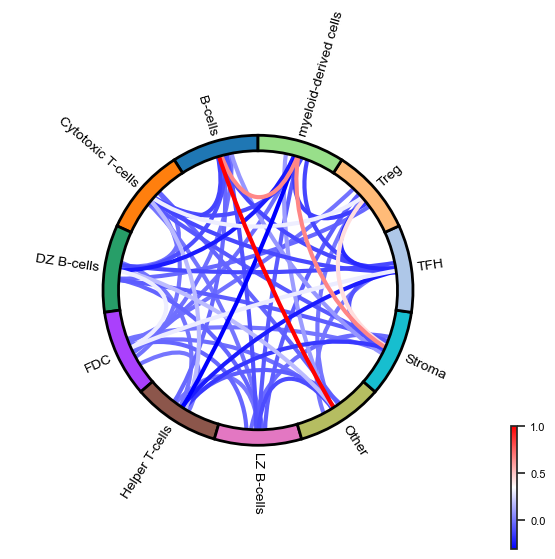

['INT Donor B', 'INT Donor E']
Processing Image: ['INT Donor B']
Categories (1, object): ['INT Donor B']
Identifying neighbours within 20 pixels of every cell
Mapping phenotype to neighbors
Performing 1000 permutations
Consolidating the permutation results
Processing Image: ['INT Donor E']
Categories (1, object): ['INT Donor E']
Identifying neighbours within 20 pixels of every cell
Mapping phenotype to neighbors
Performing 1000 permutations
Consolidating the permutation results


C:\Users\thu71\Anaconda3\envs\traj\lib\site-packages\anndata\compat\_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
C:\Users\thu71\Anaconda3\envs\traj\lib\site-packages\anndata\_core\anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


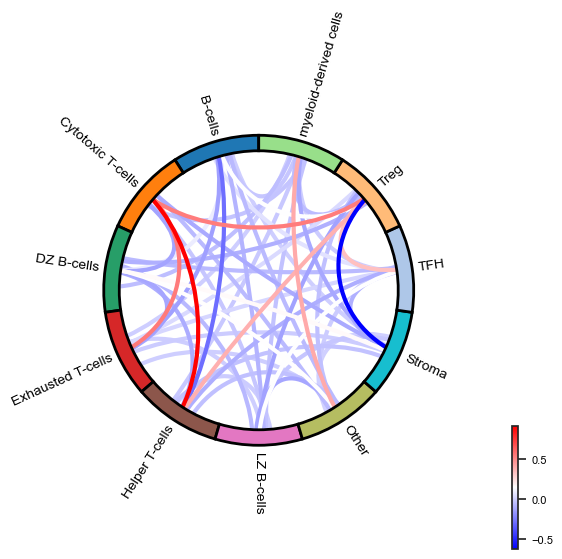

In [16]:
var =  "cluster"
tissues = [['LN Donor A', 'LN Donor E'], 
           ['TS Donor A', 'TS Donor E'],
           ['INT Donor B', 'INT Donor E']]

for d in tissues:
    print(d)
    adata_subset = adata[adata.obs.Dataset.isin(d), :]
    counts = adata_subset.obs[var].value_counts()
    low_counts = counts[counts < 500].index.tolist()
    adata_subset = adata_subset[~adata_subset.obs[var].isin(low_counts)]
    
    # Plot interaction p value 
    with sns.plotting_context('talk', font_scale=1.2):
        adata_subset = sm.tl.spatial_interaction(adata_subset,
                                             method='radius', 
                                             radius=20, 
                                             knn=15,
                                             phenotype=var,
                                             imageid='Dataset',
                                             x_coordinate='X_centroid',
                                             y_coordinate='Y_centroid')
    # Get neighboring score and p values
    adata_subset.uns['spatial_interaction'].columns
    spatial_score = adata_subset.uns['spatial_interaction'].iloc[:,[0,1,2,4]]
    p_value = adata_subset.uns['spatial_interaction'].iloc[:,[0,1,3,5]]

    stacked = spatial_score.set_index(['phenotype', 'neighbour_phenotype']).stack().reset_index()
    stacked.columns = ['phenotype', 'neighbour_phenotype', 'Tissue', 'Score']
    stacked = stacked.groupby(['phenotype', 'neighbour_phenotype']).mean().reset_index()
    score_matrix = stacked.pivot_table(index='phenotype', columns='neighbour_phenotype', values=['Score'])

    stacked = p_value.set_index(['phenotype', 'neighbour_phenotype']).stack().reset_index()
    stacked.columns = ['phenotype', 'neighbour_phenotype', 'Tissue', 'Score']
    stacked = stacked.groupby(['phenotype', 'neighbour_phenotype']).mean().reset_index()
    p_matrix = stacked.pivot_table(index='phenotype', columns='neighbour_phenotype', values=['Score'])

    # Create link matrix info
    node_names = score_matrix.index.tolist()
    con = score_matrix.values
    con = np.where(p_matrix.values < 0.00005, con, np.nan)

    # Plot chord plot
    label_colors = c=np.array([colors_rgb_dict[i]/255 for i in node_names])
    node_angles = circular_layout(node_names, node_names)

    fig, axes = plot_connectivity_circle(con, node_names, colormap='bwr', linewidth=3, 
                                         fontsize_names = 10,facecolor='white', textcolor='black',
                                          node_angles=node_angles, node_colors=label_colors) 


['LN Donor A', 'LN Donor E']
Processing Image: ['LN Donor A']
Categories (1, object): ['LN Donor A']
Identifying neighbours within 20 pixels of every cell
Mapping phenotype to neighbors
Performing 1000 permutations
Consolidating the permutation results
Processing Image: ['LN Donor E']
Categories (1, object): ['LN Donor E']
Identifying neighbours within 20 pixels of every cell
Mapping phenotype to neighbors
Performing 1000 permutations
Consolidating the permutation results


C:\Users\thu71\Anaconda3\envs\traj\lib\site-packages\anndata\compat\_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
C:\Users\thu71\Anaconda3\envs\traj\lib\site-packages\anndata\_core\anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Processing Image: LN Donor A
Processing Image: LN Donor E


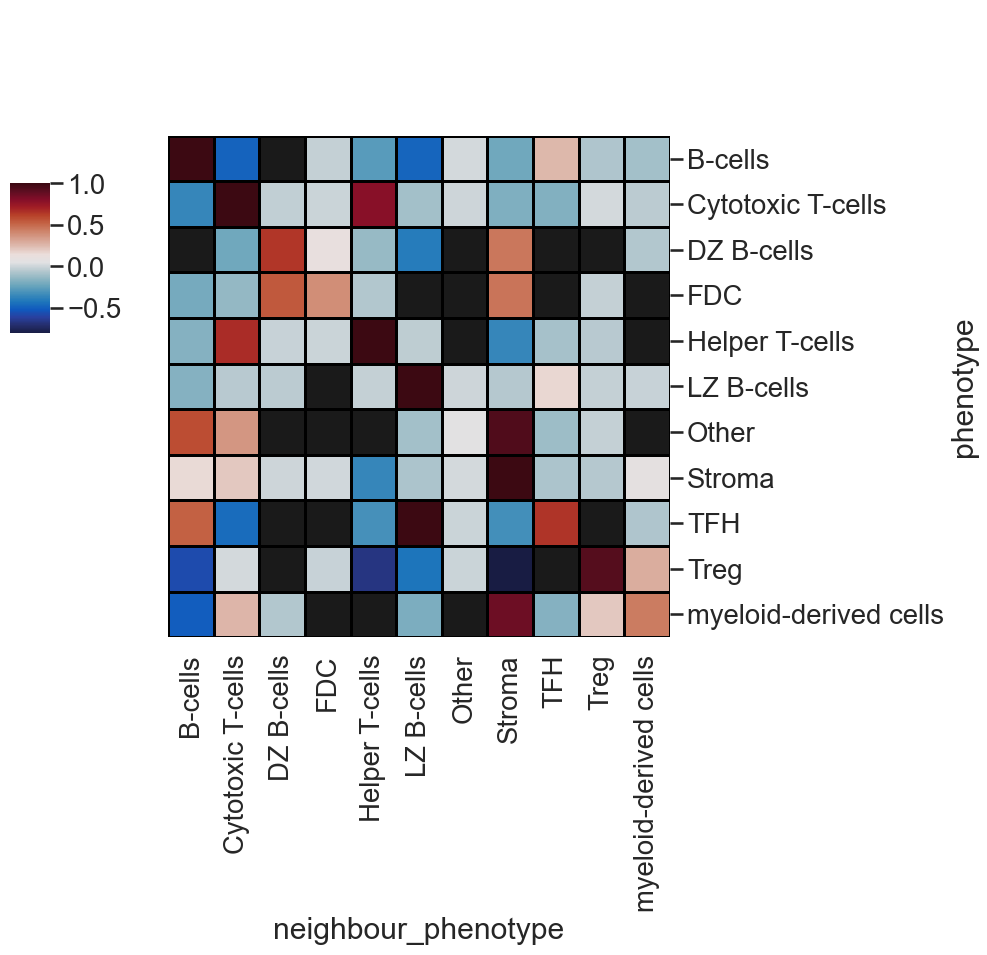

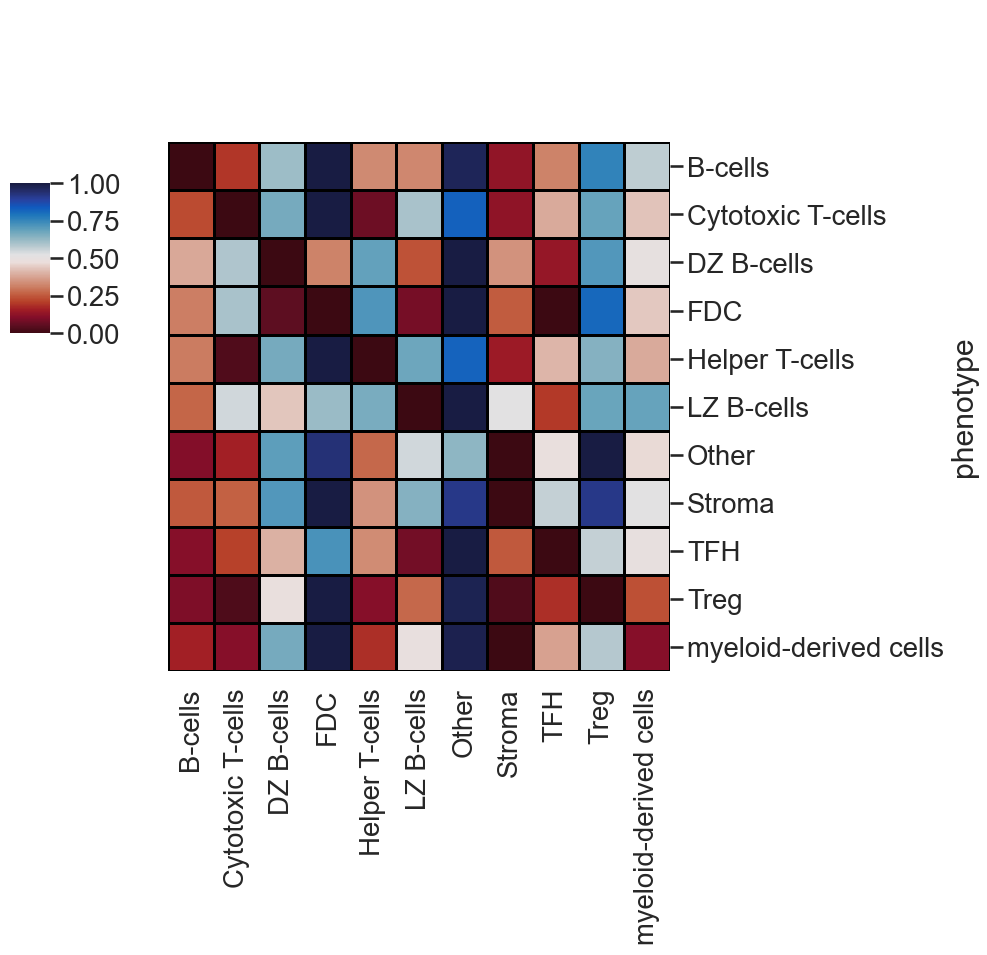

['TS Donor A', 'TS Donor E']
Processing Image: ['TS Donor A']
Categories (1, object): ['TS Donor A']
Identifying neighbours within 20 pixels of every cell
Mapping phenotype to neighbors
Performing 1000 permutations
Consolidating the permutation results
Processing Image: ['TS Donor E']
Categories (1, object): ['TS Donor E']
Identifying neighbours within 20 pixels of every cell
Mapping phenotype to neighbors
Performing 1000 permutations
Consolidating the permutation results


C:\Users\thu71\Anaconda3\envs\traj\lib\site-packages\anndata\compat\_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
C:\Users\thu71\Anaconda3\envs\traj\lib\site-packages\anndata\_core\anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Processing Image: TS Donor A
Processing Image: TS Donor E


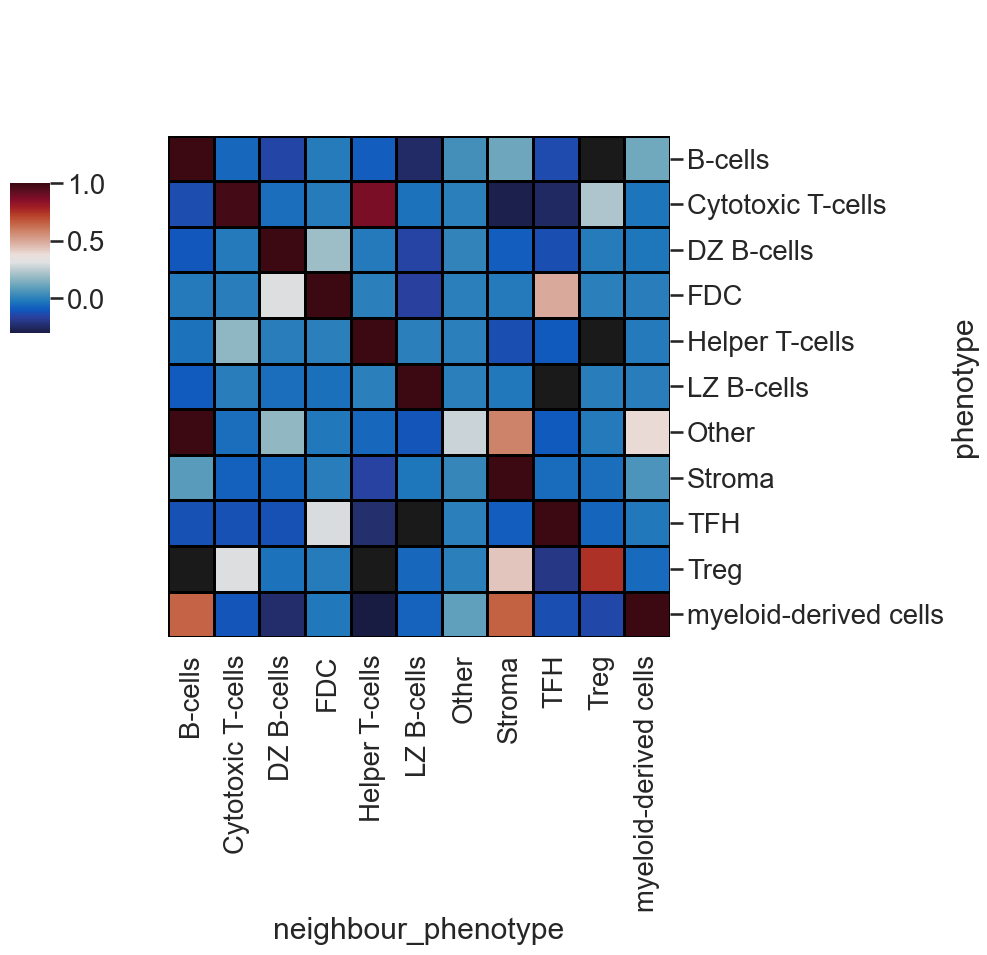

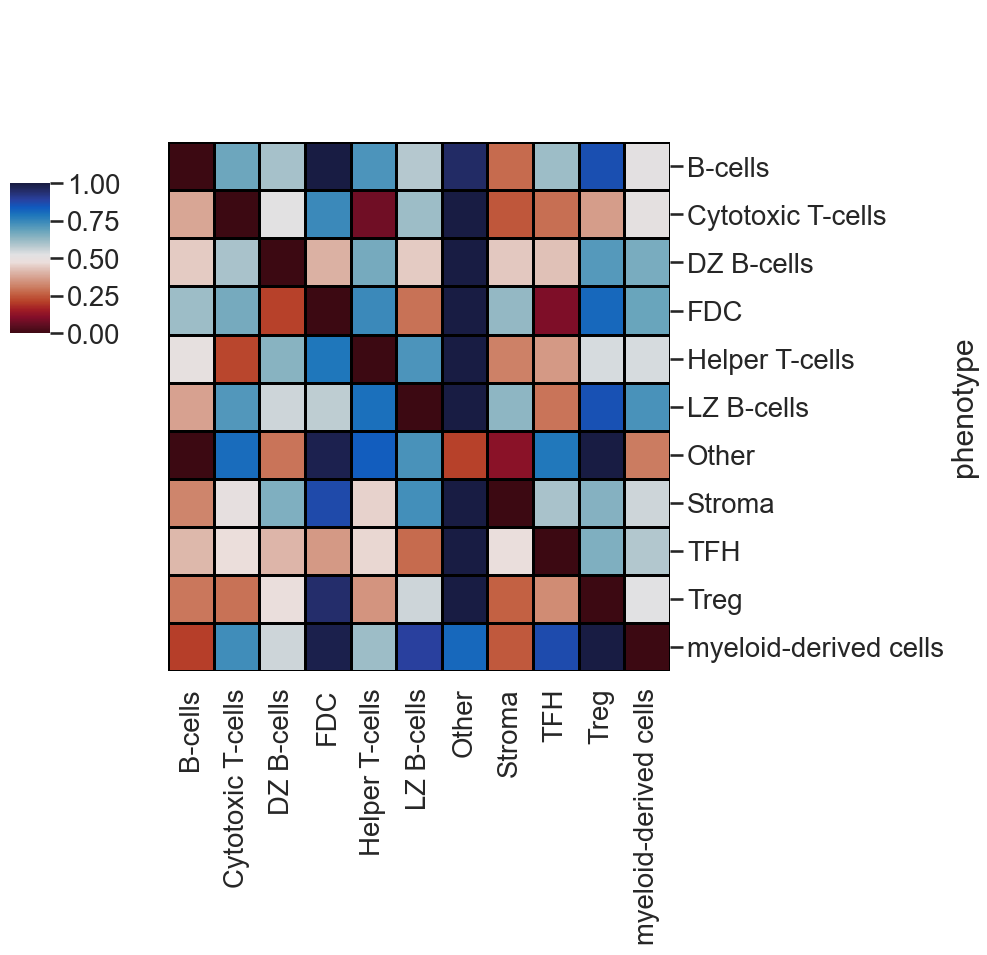

['INT Donor B', 'INT Donor E']
Processing Image: ['INT Donor B']
Categories (1, object): ['INT Donor B']
Identifying neighbours within 20 pixels of every cell
Mapping phenotype to neighbors
Performing 1000 permutations
Consolidating the permutation results
Processing Image: ['INT Donor E']
Categories (1, object): ['INT Donor E']
Identifying neighbours within 20 pixels of every cell
Mapping phenotype to neighbors
Performing 1000 permutations
Consolidating the permutation results


C:\Users\thu71\Anaconda3\envs\traj\lib\site-packages\anndata\compat\_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
C:\Users\thu71\Anaconda3\envs\traj\lib\site-packages\anndata\_core\anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Processing Image: INT Donor B
Processing Image: INT Donor E


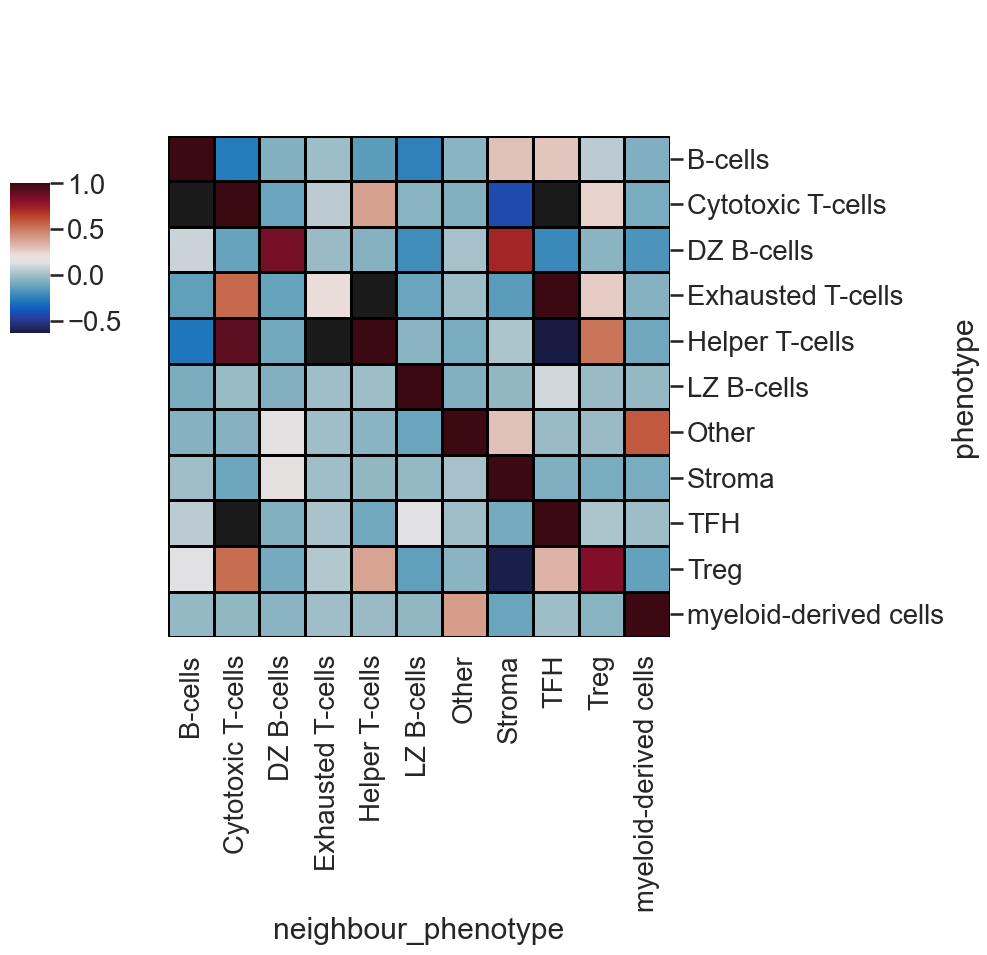

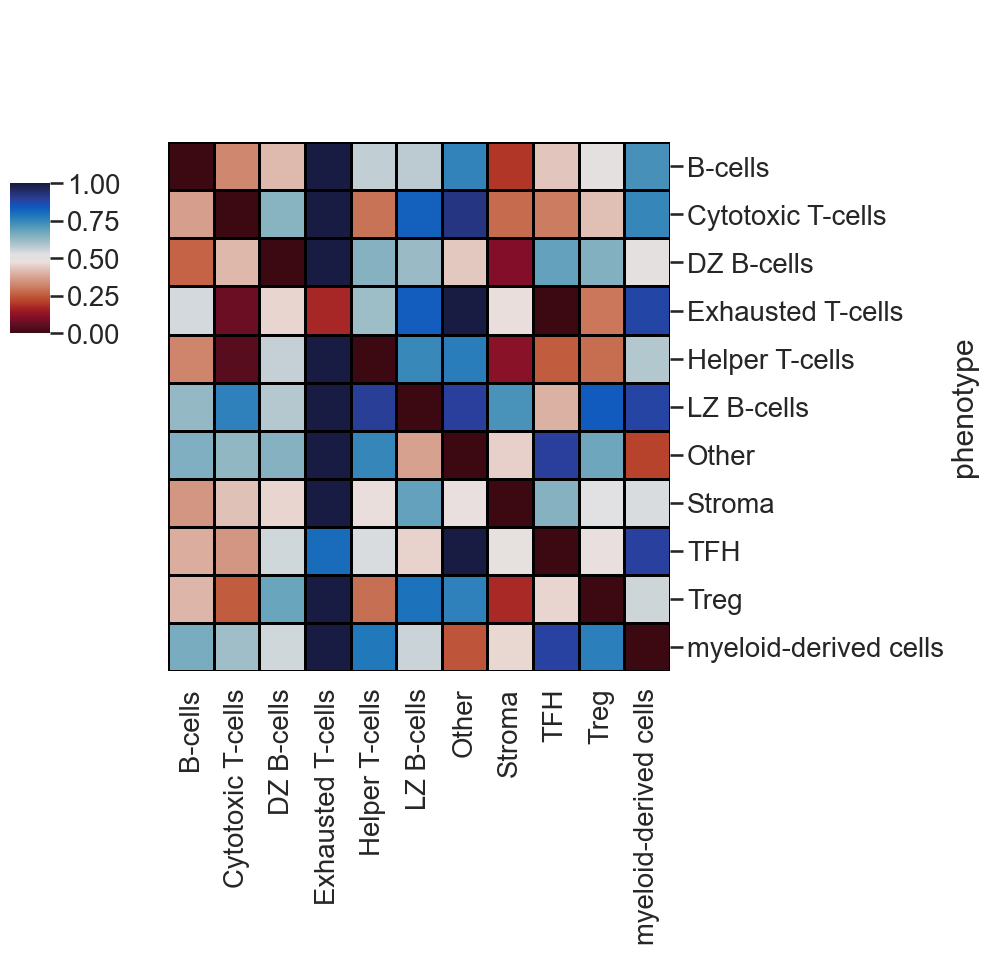

In [17]:
var =  "cluster"
tissues = [['LN Donor A', 'LN Donor E'], 
           ['TS Donor A', 'TS Donor E'],
           ['INT Donor B', 'INT Donor E']]

for d in tissues:
    print(d)
    adata_subset = adata[adata.obs.Dataset.isin(d), :]
    counts = adata_subset.obs[var].value_counts()
    low_counts = counts[counts < 500].index.tolist()
    adata_subset = adata_subset[~adata_subset.obs[var].isin(low_counts)]
    
    # Plot interaction p value 
    with sns.plotting_context('talk', font_scale=1.2):
        adata_subset = sm.tl.spatial_interaction(adata_subset,
                                             method='radius', 
                                             radius=20, 
                                             knn=15,
                                             phenotype=var,
                                             imageid='Dataset',
                                             x_coordinate='X_centroid',
                                             y_coordinate='Y_centroid')
        adata_subset.uns['spatial_interaction'].to_csv(f'{d}.csv', index=False)
        sm.pl.spatial_interaction(adata_subset, 
                          summarize_plot=True, 
                          binary_view=False,
                          row_cluster=False, 
                          linewidths=0.75, 
                          linecolor='black',
                          cmap=heatmap_cmp,
                          p_val=0.0005,
                          nonsig_color='k',
                          cbar_pos=(0.,0.644,0.04, 0.15)    
                         )
        sm.tl.spatial_distance(adata_subset, x_coordinate='X_centroid', phenotype=var,
                              y_coordinate='Y_centroid', imageid='Dataset')

        sm.pl.spatial_distance(adata_subset,  phenotype=var, imageid='Dataset', heatmap_cmap=heatmap_cmp_r,
                       linewidths=0.75, linecolor='black', cbar_pos=(0.,0.644,0.04, 0.15), log=True)
    plt.show()


# Compare all tissues interaction 

In [11]:
# Pass the ROI's as different images
adata = sm.tl.spatial_interaction(adata, 
                                 method='radius', 
                                 radius=20, 
                                 knn=15,
                                 phenotype='Phenotype',
                                 imageid='Dataset',
                                 x_coordinate='X_centroid',
                                 y_coordinate='Y_centroid',
                                 label='spatial_interaction_all'
                                 )



Processing Image: ['LN Donor A']
Categories (1, object): ['LN Donor A']
Identifying neighbours within 20 pixels of every cell
Mapping phenotype to neighbors
Performing 1000 permutations
Consolidating the permutation results
Processing Image: ['LN Donor E']
Categories (1, object): ['LN Donor E']
Identifying neighbours within 20 pixels of every cell
Mapping phenotype to neighbors
Performing 1000 permutations
Consolidating the permutation results
Processing Image: ['INT Donor B']
Categories (1, object): ['INT Donor B']
Identifying neighbours within 20 pixels of every cell
Mapping phenotype to neighbors
Performing 1000 permutations
Consolidating the permutation results
Processing Image: ['INT Donor E']
Categories (1, object): ['INT Donor E']
Identifying neighbours within 20 pixels of every cell
Mapping phenotype to neighbors
Performing 1000 permutations
Consolidating the permutation results
Processing Image: ['TS Donor A']
Categories (1, object): ['TS Donor A']
Identifying neighbours withi

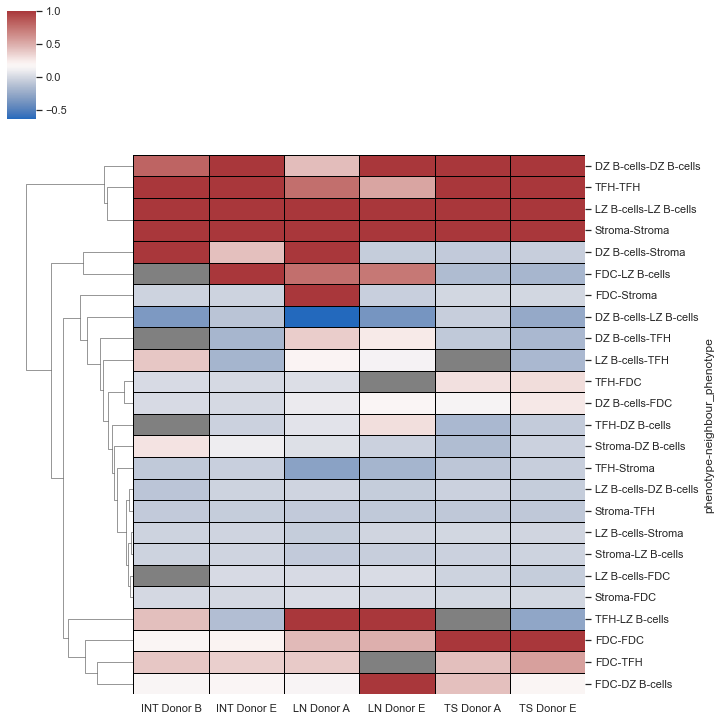

In [12]:
subset_phenotype = ['B cells', 'LZ B-cells', 'TFH', 'DZ B-cells', 'FDC', 'Stroma']

sm.pl.spatial_interaction(adata, 
                          summarize_plot=False, 
                          spatial_interaction='spatial_interaction_all',
                          subset_phenotype=subset_phenotype , 
                          subset_neighbour_phenotype=subset_phenotype ,
                          yticklabels=True,
                          row_cluster=True, linewidths=0.75, linecolor='black', cbar_pos=(0.,0.844,0.04, 0.15)  )

In [13]:
var = 'Phenotype'

sm.tl.spatial_distance(adata, x_coordinate='X_centroid', phenotype=var,
                                      y_coordinate='Y_centroid', imageid='Dataset')


Processing Image: LN Donor A
Processing Image: LN Donor E
Processing Image: INT Donor B
Processing Image: INT Donor E
Processing Image: TS Donor A
Processing Image: TS Donor E


AnnData object with n_obs × n_vars = 999970 × 17
    obs: 'ROI', 'Cell', 'Dataset', 'leiden', 'Phenotype_r1', 'Phenotype_r1_n', 'Phenotype', 'X_centroid', 'Y_centroid'
    uns: 'Dataset_colors', 'Phenotype_colors', 'Phenotype_r1_colors', 'dendrogram_Phenotype', 'dendrogram_Phenotype_r1', 'dendrogram_leiden', 'leiden', 'leiden_colors', 'neighbors', 'spatial_interaction_all', 'spatial_distance'
    obsm: 'X_scanorama', 'X_tsne', 'spatial'
    obsp: 'connectivities', 'distances'

ValueError: min() arg is an empty sequence

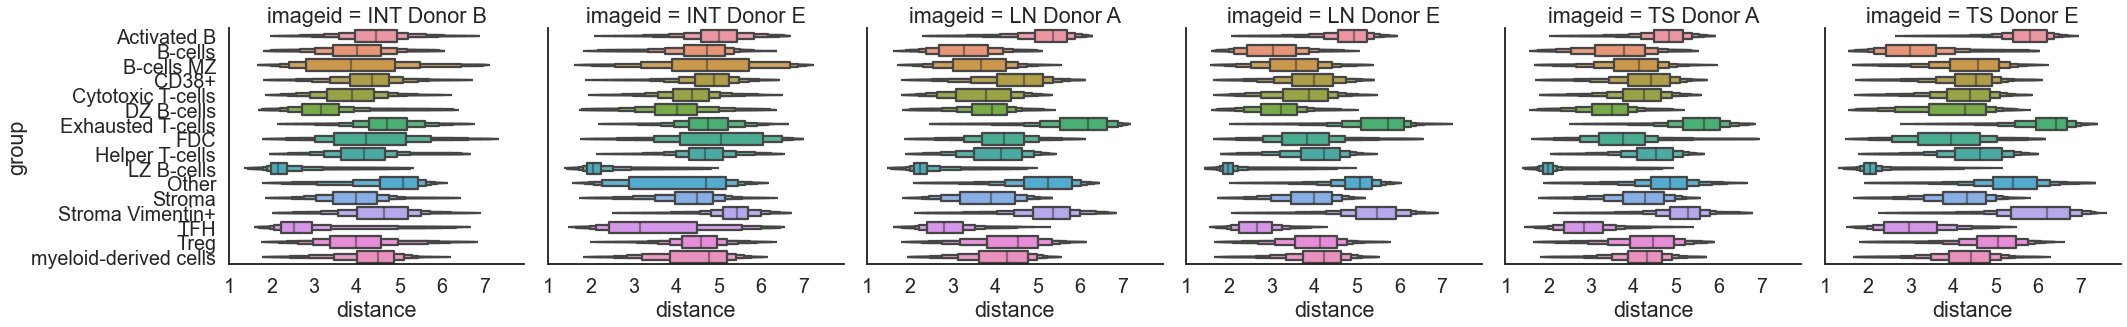

In [14]:
sns.set_style('white')
with sns.plotting_context('talk', font_scale=1.2):
    sm.pl.spatial_distance(adata, method='numeric', phenotype='Phenotype', 
                       imageid='Dataset', distance_from='LZ B-cells', log=True, showfliers=False)
    sm.pl.spatial_distance(adata, method='numeric', phenotype='Phenotype', 
                       imageid='Dataset', distance_from='Stromal cells', log=True, showfliers=False)
    sm.pl.spatial_distance(adata, method='numeric', phenotype='Phenotype', 
                       imageid='Dataset', distance_from='Follicular Helper T-cells', log=True, showfliers=False)
    

In [ ]:
sm.pl.spatial_distance (adata, phenotype='Phenotype', method='distribution', distance_from='LZ B-cells',distance_to ='B cells', imageid='Dataset', log=True)

# Proximity score